In [1]:
################################################
#### Jingying Wang <astro.jywang@gmail.com> ####
###############################################
#imports
import katdal
import numpy as np
import matplotlib.pylab as plt
import astropy.coordinates as ac
import functools
import healpy as hp
import optparse
import warnings
from matplotlib.backends.backend_pdf import PdfPages
import healpy as hp
from astropy import units as u
from matplotlib.offsetbox import AnchoredText
from matplotlib.colors import LogNorm
import time
import pickle
import sys
Tcmb=2.725
import katcali
import katcali.visualizer as kv
import katcali.models as km
import katcali.rfi as kr
import katcali.solver as ks
import katcali.io as kio
import katcali.label_dump as kl
import katcali.diode as kd
import katcali.filter as kf
import katcali.beam as kb

from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
print ('start @ ' + time.asctime(time.localtime(time.time())) +'#')

start @ Mon Oct 31 11:49:20 2022#


In [3]:
print (katcali.__version__)

2.0.0


In [4]:
print  (plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'])
plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'] = 14, 1.5, 1.5
#plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'] = 10.0, 0.8, 1.5
print  (plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'])

10.0 0.8 1.5
14.0 1.5 1.5


In [5]:
input_file='/idia/projects/hi_im/raw_vis/MeerKLASS2021/level1/mask/checked/'

# Select an observation block and load basic information in


In [6]:
fname='1630519596'#'1631810671'#'1634835083'#'1631982988' #'1631659886'

data=kio.load_data(fname)
#print data

In [7]:
target,c0,bad_ants,flux_model=kio.check_ants(fname)


calibrator: PKS1934-638, ra,dec= 294d51m15.39s, -63d42m45.6264s
bad_ants: []


In [8]:
if target=='PKS1934-638':
    tag='1934-638'
if target=='PictorA':
    tag='PictorA'

In [9]:
data.select()
data.select(targets=tag+'_u0.5')
target_start=data.target_indices[0]
data.select()

In [10]:
ants_good=[]
for i in np.array(kio.ant_list(data)):
    if i not in bad_ants:
        ants_good.append(i)
    else:
        print (str(i) + ' is bad')
        
print (fname)
print (ants_good)

1630519596
['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm034', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063']


In [11]:
nd_on_time,nd_cycle,nd_set=kd.cal_nd_basic_para(fname)
print (nd_on_time,nd_cycle,nd_set)

0.292376308037 19.4917538692 1630519596.16


# Select ant and polarization, then load data in 

In [12]:
#select ant, polarization, and one channel to show data calibration
ant='m050'
pol='v'
ch_plot=800


In [13]:
#load data, labels, and parameters
ch_ref=800
data.select(ants=ant,pol=pol)
recv=ant+pol
corr_id=kio.cal_corr_id(data,recv)
assert(recv==data.corr_products[corr_id][0])
assert(recv==data.corr_products[corr_id][1])
print (corr_id,recv)

0 m050v


In [14]:
vis,flags= kio.call_vis(fname,recv)
vis_backup=vis.copy()

# loaded data was saved in python2
['m050v' 'm050v']


In [15]:

ra,dec,az,el=kio.load_coordinates(data)
timestamps,freqs=kio.load_tf(data)
dump_period=data.dump_period
ang_deg=kio.load_ang_deg(ra,dec,c0)
dp_tt,dp_ss,dp_f,dp_w, dp_t,dp_s,dp_slew,dp_stop=kl.cal_dp_label(data,flags,ant,pol,ch_ref,ang_deg)

In [16]:

dp_ca,dp_cb,dp_c0a, dp_c1a,dp_c2a,dp_c3a,dp_c4a,dp_c0b,dp_c1b,dp_c2b,dp_c3b,dp_c4b,dp_c1a1,dp_c1a2,dp_c1a3,dp_c1b1,dp_c1b2,dp_c1b3=kl.cal_dp_c(fname,data,ant,pol,flags,ch_ref,dp_tt,dp_ss,ang_deg, target_start=target_start,n_src_off=4)
dp_list1=[dp_c1a,dp_c0a,dp_c2a,dp_c3a,dp_c4a]
dp_list2=[dp_c1b,dp_c0b,dp_c2b,dp_c3b,dp_c4b]

deg filter start: 0.5000162915446345+/-7.444766482344135e-05
deg filter end: 0.5000162915446345+/-7.444766482344135e-05

deg filter start: 0.0001408887618809211+/-7.349222789538585e-05
deg filter end: 0.0001408887618809211+/-7.349222789538585e-05

deg filter start: 0.5000186219887516+/-0.00010221829936453044
deg filter end: 0.5000186219887516+/-0.00010221829936453044

deg filter start: 0.49999330487737553+/-8.933859480614928e-05
deg filter end: 0.49999330487737553+/-8.933859480614928e-05

deg filter start: 0.4999678336580414+/-0.00014249236587596893
deg filter end: 0.4999678336580414+/-0.00014249236587596893

# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 36 -> 34
# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 35

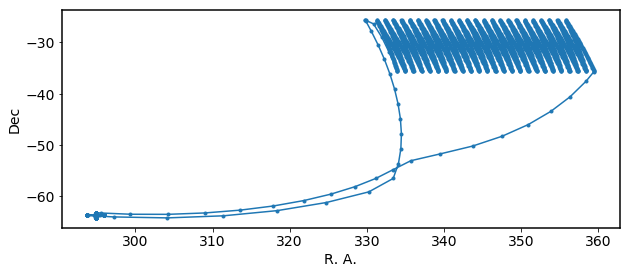

In [17]:
#show the scan route, typically track calibrator + scan sky + track calibrator 
plt.figure(figsize=(10,4))
plt.plot(ra,dec,'.-')
#plt.plot(ra[dp_s],dec[dp_s],'g.')
#plt.plot(ra[dp_tt],dec[dp_tt],'m.')
plt.xlabel('R. A.')
plt.ylabel('Dec')
plt.show()

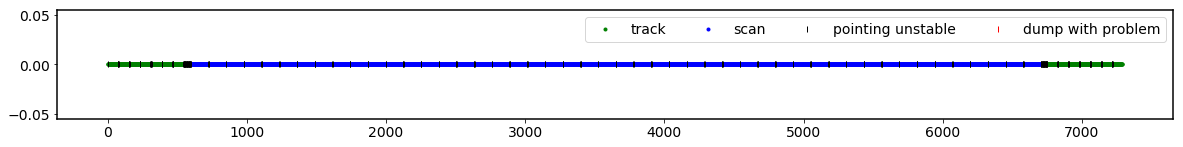

In [18]:
#show time dump label along the scan 
plt.figure(figsize=(20,2))
plt.plot(timestamps[dp_tt]-timestamps[0],np.zeros_like(dp_tt),'g.')
plt.plot(timestamps[dp_ss]-timestamps[0],np.zeros_like(dp_ss),'b.')
plt.plot(timestamps[dp_w]-timestamps[0],np.zeros_like(dp_w),'k|')
plt.plot(timestamps[dp_f]-timestamps[0],np.zeros_like(dp_f),'r|')
plt.legend(['track','scan','pointing unstable','dump with problem'],ncol=4)
plt.show()

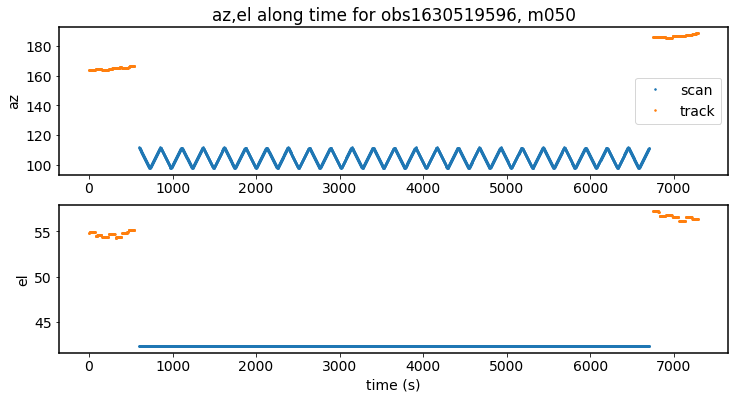

In [19]:
#show the az,el along time
plt.figure(figsize=(12,6))
plt.subplot(211)
if ant not in bad_ants:
    plt.plot(timestamps[dp_ss]-timestamps[0],az[dp_ss],'.',Markersize=3)
    plt.plot(timestamps[dp_tt]-timestamps[0],az[dp_tt],'.',Markersize=3)
#plt.xlabel('time (s)')
plt.ylabel('az')
plt.title('az,el along time for obs'+str(fname)+', '+str(ant))
plt.legend(['scan','track'])
plt.subplot(212)
if ant not in bad_ants:
    plt.plot(timestamps[dp_ss]-timestamps[0],el[dp_ss],'.',Markersize=3)
    plt.plot(timestamps[dp_tt]-timestamps[0],el[dp_tt],'.',Markersize=3)
plt.xlabel('time (s)')
plt.ylabel('el')
plt.savefig(str(fname)+'_'+str(ant)+'_azel.pdf',  bbox_inches='tight')
plt.show()

In [20]:
az_corr=az.copy()
for i in range(len(az)):
    if az[i]>180:
        az_corr[i]=az[i]-360

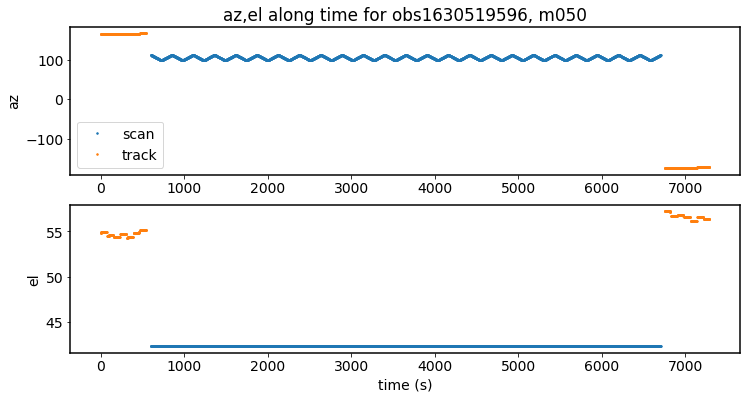

In [21]:
#show the az,el along time
plt.figure(figsize=(12,6))
plt.subplot(211)
if ant not in bad_ants:
    plt.plot(timestamps[dp_ss]-timestamps[0],az_corr[dp_ss],'.',Markersize=3)
    plt.plot(timestamps[dp_tt]-timestamps[0],az_corr[dp_tt],'.',Markersize=3)
#plt.xlabel('time (s)')
plt.ylabel('az')
plt.title('az,el along time for obs'+str(fname)+', '+str(ant))
plt.legend(['scan','track'])
plt.subplot(212)
if ant not in bad_ants:
    plt.plot(timestamps[dp_ss]-timestamps[0],el[dp_ss],'.',Markersize=3)
    plt.plot(timestamps[dp_tt]-timestamps[0],el[dp_tt],'.',Markersize=3)
plt.xlabel('time (s)')
plt.ylabel('el')
plt.savefig(str(fname)+'_'+str(ant)+'_azel.pdf',  bbox_inches='tight')
plt.show()

In [22]:
az=az_corr.copy()

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


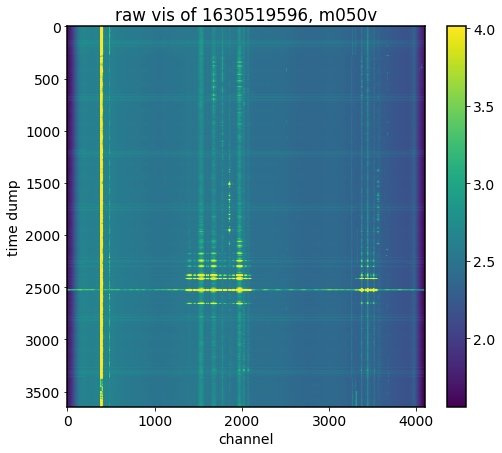

In [23]:
#raw visibility
plt.figure(figsize=(8,7))
plt.imshow(np.log10(vis),aspect='auto')
plt.ylabel('time dump')
plt.xlabel('channel')
plt.title('raw vis of '+str(fname)+', '+str(recv))
plt.colorbar()
#plt.savefig(str(fname)+'_'+str(recv)+'_raw_vis.pdf')
plt.show()

In [24]:
nd_on_edge,nd_off_edge=kd.cal_nd_edges(timestamps,nd_set,nd_cycle,nd_on_time)
print (len(nd_on_edge),len(nd_off_edge))
nd_ratio,nd_0, nd_1x=kd.cal_nd_ratio(timestamps, nd_on_time, nd_on_edge, dump_period)

edge number 0-374
375 375
*** diode 0 was fired out of timestamps list: -17.06315779685974 not in [0,7288.9163699150085]
# checked: len(nd_0)+len(nd_1x)==len(timestamps)


In [25]:
vis1=vis[:,ch_plot]
plt_ymin=vis1.min()
plt_ymax=vis1.max()

# RFI flagging

In [26]:
#check with .py result
try:
    d3 = pickle.load(open(input_file+fname+'_'+ant+'_mask2', 'rb'))
    print ('mask2 loaded')
except(Exception):
    d3 = pickle.load(open(input_file+fname+'_'+ant+'_mask', 'rb'))
    print ('mask loaded')
    
mask_inter=d3['mask']
vis_clean=np.ma.array(vis,mask=mask_inter)


mask2 loaded


/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


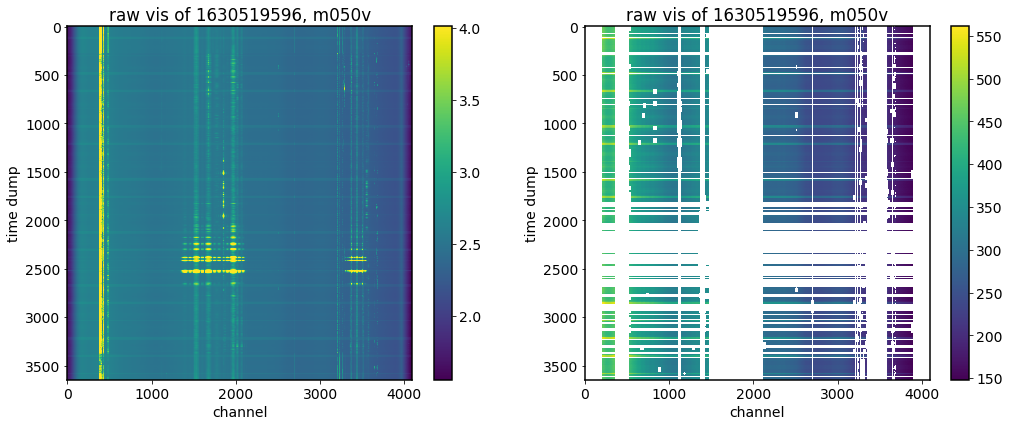

In [27]:
#raw visibility
plt.figure(figsize=(17,6.5))
plt.subplot(121)
plt.imshow(np.log10(vis),aspect='auto')
plt.ylabel('time dump')
plt.xlabel('channel')
plt.title('raw vis of '+str(fname)+', '+str(recv))
plt.colorbar()
plt.subplot(122)
plt.imshow(vis_clean,aspect='auto')
plt.ylabel('time dump')
plt.xlabel('channel')
plt.title('raw vis of '+str(fname)+', '+str(recv))
plt.colorbar()
plt.show()

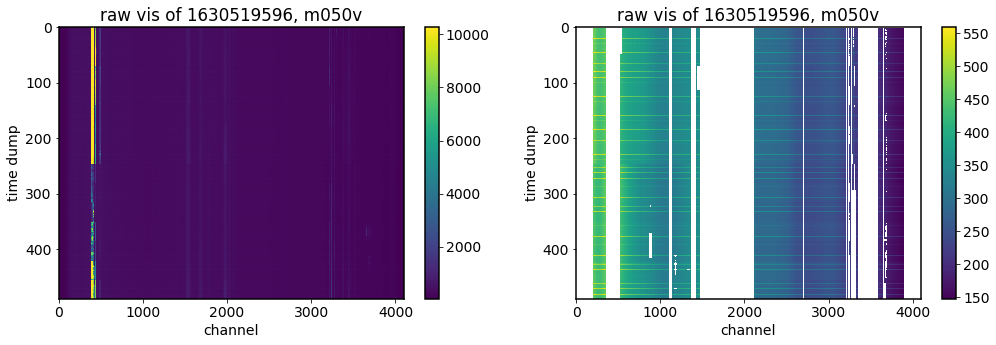

In [28]:
#raw visibility
plt.figure(figsize=(17,5))
plt.subplot(121)
plt.imshow(vis[dp_tt,:],aspect='auto')
plt.ylabel('time dump')
plt.xlabel('channel')
plt.title('raw vis of '+str(fname)+', '+str(recv))
plt.colorbar()
plt.subplot(122)
plt.imshow(vis_clean[dp_tt,:],aspect='auto')
plt.ylabel('time dump')
plt.xlabel('channel')
plt.title('raw vis of '+str(fname)+', '+str(recv))
plt.colorbar()
plt.show()

# calibrate the diode noise using point source calibrator 

## load the foreground models

In [29]:
#load the scan and track labels 
dp_u=kl.cal_dp_u(dp_tt,dp_ss)

#cal_Tspill is for single channel only! cal_Tspill_func has higher efficiency for multi channel calibration


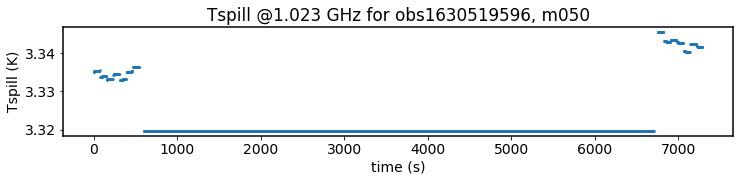

In [30]:
#spill model 
#Tspill_ori=km.cal_Tspill(el,pol,freqs, ch_plot,1) #raw vesrion from katconfig, with an interpolation problem
Tspill_upd=km.cal_Tspill(el,pol,freqs, ch_plot,2) #fixed version
#Tspill_temp=Tspill_ori*(data.temperature+273.15)/300.
plt.figure(figsize=(12,2))
plt.plot(timestamps[dp_u]-timestamps[0],Tspill_upd[dp_u],'.', ms=3)
#plt.plot(timestamps[dp_u]-timestamps[0],Tspill_ori[dp_u],'.', ms=3)
#plt.plot(timestamps[dp_u]-timestamps[0],Tspill_temp[dp_u],'y.', ms=3)
plt.title('Tspill @'+str(round(freqs[ch_plot]/1e9,3)) +' GHz for obs'+fname+', '+ant)
plt.xlabel('time (s)')
plt.ylabel('Tspill (K)')
plt.show()

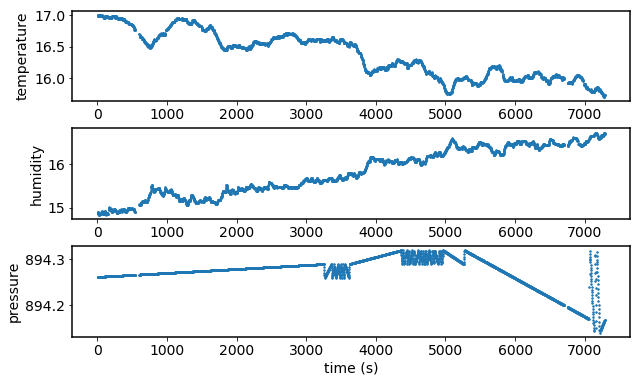

In [31]:
plt.figure(figsize=(10,6))
plt.subplots_adjust(wspace=0.1,hspace=0.3)
plt.subplot(311)
plt.plot(timestamps[dp_u]-timestamps[0],data.temperature[dp_u],'.', ms=3)
plt.ylabel('temperature')
plt.subplot(312)
plt.plot(timestamps[dp_u]-timestamps[0],data.humidity[dp_u],'.', ms=3)
#plt.xlabel('time (s)')
plt.ylabel('humidity')
plt.subplot(313)
plt.plot(timestamps[dp_u]-timestamps[0],data.pressure[dp_u],'.', ms=3)
plt.xlabel('time (s)')
plt.ylabel('pressure')
plt.show()


In [32]:
Tspill=Tspill_upd
#Tspill=Tspill_ori

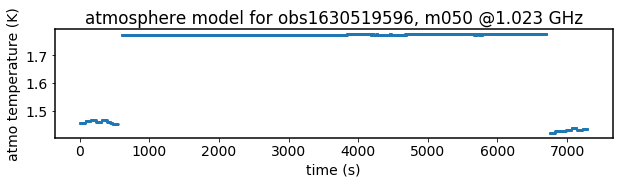

In [33]:
#atmosphere emission model
Tatmo=km.calc_atmosphere_model_1ch(data,ch_plot)

plt.figure(figsize=(10,2))
plt.plot(timestamps[dp_u]-timestamps[0],Tatmo[dp_u],'.', ms=3)
plt.xlabel('time (s)')
plt.ylabel('atmo temperature (K)')
plt.title('atmosphere model for obs'+str(fname)+', '+str(ant)+' @'+str(round(data.freqs[ch_plot]/1e9,3))+' GHz')
plt.show()

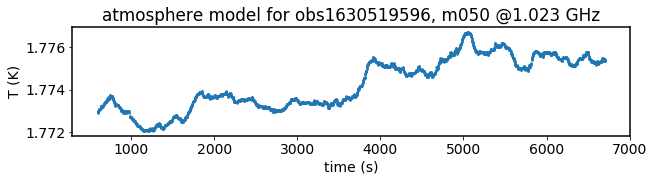

In [34]:
plt.figure(figsize=(10,2))
plt.plot(timestamps[dp_ss]-timestamps[0],Tatmo[dp_ss],'.', ms=3)
plt.xlabel('time (s)')
plt.ylabel('T (K)')
plt.title('atmosphere model for obs'+str(fname)+', '+str(ant)+' @'+str(round(data.freqs[ch_plot]/1e9,3))+' GHz')
plt.show()

In [35]:
###test begin

(3647,)


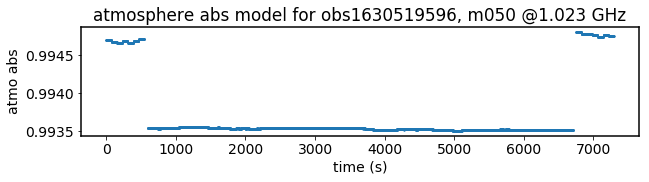

In [36]:
#atmosphere emission model
Tatmo_abs_1ch=km.calc_atmosphere_trans_factor_1ch(data,ch_plot) #old name:calc_atmosphere_abs_factor_1ch

plt.figure(figsize=(10,2))
plt.plot(timestamps[dp_u]-timestamps[0],Tatmo_abs_1ch[dp_u],'.', ms=3)
plt.xlabel('time (s)')
plt.ylabel('atmo abs')
plt.title('atmosphere abs model for obs'+str(fname)+', '+str(ant)+' @'+str(round(data.freqs[ch_plot]/1e9,3))+' GHz')
plt.show()

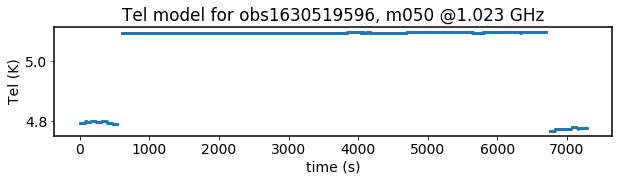

In [37]:
#elevation related emission model
Tel=Tspill+Tatmo 

plt.figure(figsize=(10,2))
plt.plot(data.timestamps[dp_u]-data.timestamps[0],Tel[dp_u],'.',ms=3)
plt.xlabel('time (s)')
plt.ylabel('Tel (K)')
plt.title('Tel model for obs'+str(fname)+', '+str(ant)+' @'+str(round(data.freqs[ch_plot]/1e9,3))+' GHz')
plt.show()

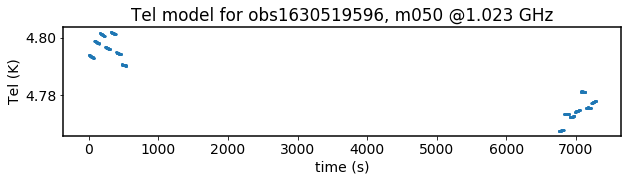

In [38]:
plt.figure(figsize=(10,2))
plt.plot(data.timestamps[dp_tt]-data.timestamps[0],Tel[dp_tt],'.',ms=3)
plt.xlabel('time (s)')
plt.ylabel('Tel (K)')
plt.title('Tel model for obs'+str(fname)+', '+str(ant)+' @'+str(round(data.freqs[ch_plot]/1e9,3))+' GHz')
plt.show()

#cal_Tnd is for single channel only! Tnd_spl has higher efficiency for multi channel calibration
l.4035 h
l.4035 v
1.1802307066785478


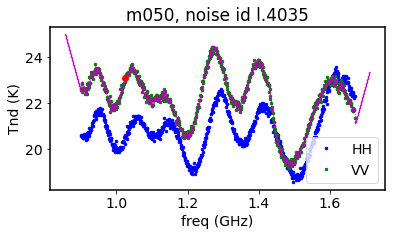

1.1802307066785478 23.07245815127522


In [39]:
#load the diode injection model and get a reference value
#note: diode version are different dish by dish!
Tnd_std,Tnd_ref,noise,Tnd_spl= km.call_Tnd(data, ant, pol,freqs,ch_plot,1)
print (Tnd_std,Tnd_ref)

## load calibrator model: related to the beam model##################


In [40]:
#BM-I: calculated Gaussian
T_ptr0=kb.cal_BMI(freqs,ch_plot,flux_model,ang_deg)


127.85840070217056


In [41]:
#select beam pattern model
beam_select='me'

In [42]:
#BM-II: pattern fitted Gaussian
T_ptr1=kb.cal_BMII(freqs,ch_plot,pol,flux_model,ang_deg,beam_select)


#load_Bdata is for single channel only! load_Bdata_fband has higher efficiency for multi channel calibration
p513_d5_ch4096/p1


In [43]:
#BM-III:pattern


In [44]:
#test begin

m000v
m005v
m010v
m015v
m020v
m025v
m030v
m035v
m040v
m045v
m050v
m055v
m060v
*** no data for m060v ***
m063v


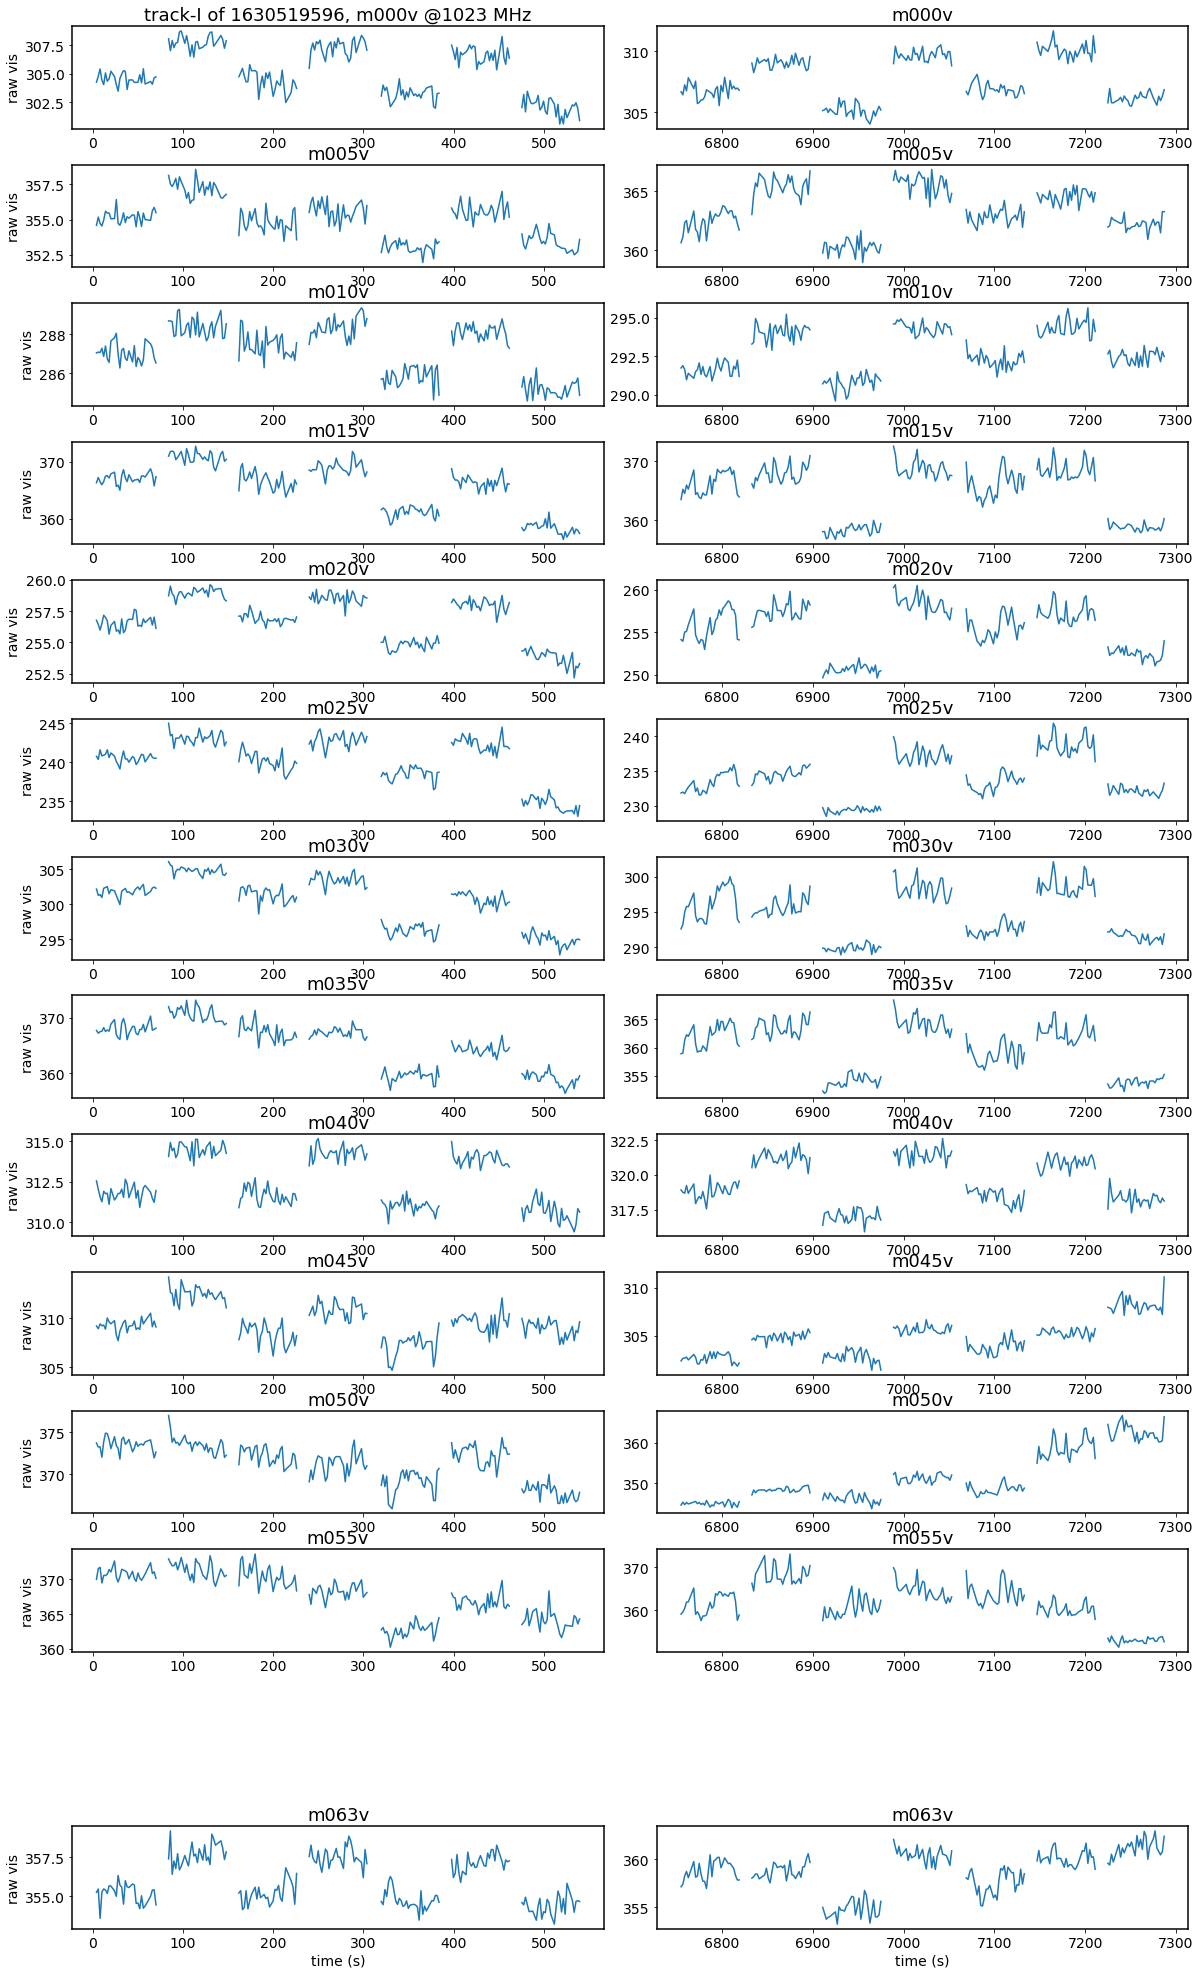

In [45]:
pol111=pol
ant111_list=['m000','m005','m010','m015','m020','m025','m030','m035','m040','m045','m050','m055','m060','m063']
row=len(ant111_list)
plt.figure(figsize=(20,35))
plt.subplots_adjust(wspace=0.1,hspace=0.35)
for ant_i in range(len(ant111_list)):    
    recv111=ant111_list[ant_i]+pol111
    print (recv111,)
    try:
        data111 = pickle.load(open('/idia/projects/hi_im/raw_vis/SCI-20210212-MS-01/'+str(fname)+'/'+str(fname)+'_'+str(recv111)+'_vis_data','rb'),encoding='latin-1')

        vis111=data111['vis']
        flags111=data111['flags']

        visa_ptr111 = np.ma.array(vis111.copy(),mask=flags111)
        visb_ptr111 = visa_ptr111.copy()
        for i in range(len(timestamps)):
            if i not in dp_ca:
                visa_ptr111.mask[i,:]=True
            if i not in dp_cb:
                visb_ptr111.mask[i,:]=True

        plt.subplot(row,2, 2*ant_i+1)
        if (visa_ptr111.mask[nd_0,ch_plot]==True).all()==False:
            plt.plot(timestamps[nd_0]-timestamps[0],visa_ptr111[nd_0,ch_plot])

        plt.ylabel('raw vis')
        if ant_i==len(ant111_list)-1:
            plt.xlabel('time (s)')
        if ant_i==0:
            plt.title('track-I of '+str(fname)+', '+recv111+' @'+ str(round(freqs[ch_plot]/1e6)) +' MHz',fontsize=18)
        if ant_i>0:
            plt.title(recv111,fontsize=18)

        plt.subplot(row,2, 2*ant_i+2)
        if (visb_ptr111.mask[nd_0,ch_plot]==True).all()==False:
            plt.plot(timestamps[nd_0]-timestamps[0],visb_ptr111[nd_0,ch_plot])
        plt.title(recv111,fontsize=18)
    except(Exception):
        print ('*** no data for '+ str(recv111)+' ***')

plt.xlabel('time (s)')
#plt.savefig(str(fname)+'_'+pol111+'.png',  bbox_inches='tight')
plt.show()

m000v
m005v
m010v
m015v
m020v
m025v
m030v
m035v
m040v
m045v
m050v
m055v
m060v
*** no data for m060v ***
m063v


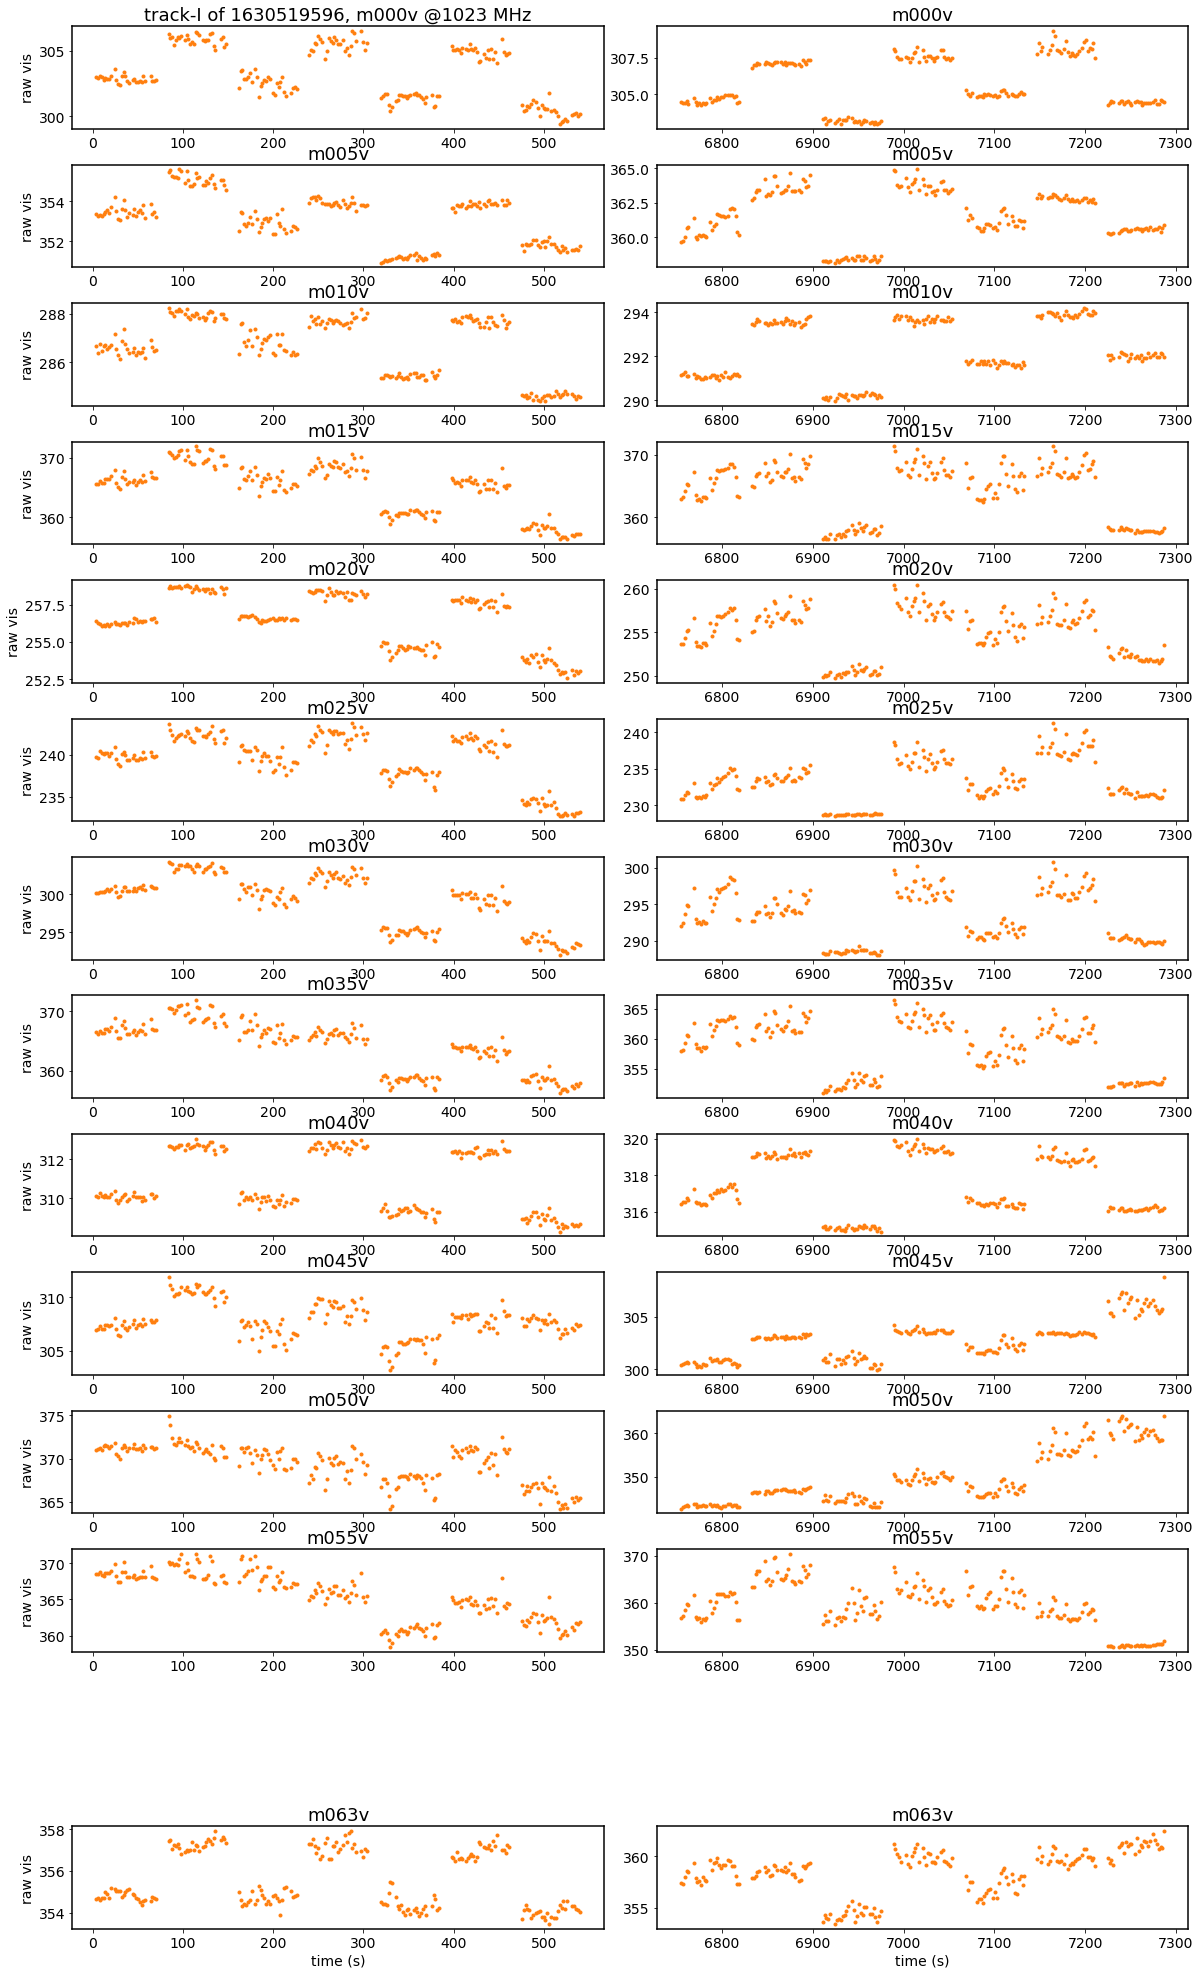

In [46]:
ch_hw=25 #half width of channel bin

row=len(ant111_list)
plt.figure(figsize=(20,35))
plt.subplots_adjust(wspace=0.1,hspace=0.35)
for ant_i in range(len(ant111_list)):    
    recv111=ant111_list[ant_i]+pol111
    print (recv111,)
    try:
        data111 = pickle.load(open('/idia/projects/hi_im/raw_vis/SCI-20210212-MS-01/'+str(fname)+'/'+str(fname)+'_'+str(recv111)+'_vis_data','rb'),encoding='latin-1')

        vis111=data111['vis']
        flags111=data111['flags']

        visa_ptr111 = np.ma.array(vis111.copy(),mask=flags111)
        visb_ptr111 = visa_ptr111.copy()
        for i in range(len(timestamps)):
            if i not in dp_ca:
                visa_ptr111.mask[i,:]=True
            if i not in dp_cb:
                visb_ptr111.mask[i,:]=True

        plt.subplot(row,2, 2*ant_i+1)
        if (visa_ptr111.mask[nd_0,ch_plot]==True).all()==False:
            #plt.plot(timestamps[nd_0]-timestamps[0],visa_ptr111[nd_0,ch_plot])
            plt.plot(timestamps[nd_0]-timestamps[0],np.ma.mean(visa_ptr111[nd_0,ch_plot-ch_hw:ch_plot+ch_hw+1],axis=1),'.',color='C1')
        plt.ylabel('raw vis')
        if ant_i==len(ant111_list)-1:
            plt.xlabel('time (s)')
        if ant_i==0:
            plt.title('track-I of '+str(fname)+', '+recv111+' @'+ str(round(freqs[ch_plot]/1e6)) +' MHz',fontsize=18)
        if ant_i>0:
            plt.title(recv111,fontsize=18)

        plt.subplot(row,2, 2*ant_i+2)
        if (visb_ptr111.mask[nd_0,ch_plot]==True).all()==False:
            #plt.plot(timestamps[nd_0]-timestamps[0],visb_ptr111[nd_0,ch_plot])
            plt.plot(timestamps[nd_0]-timestamps[0],np.ma.mean(visb_ptr111[nd_0,ch_plot-ch_hw:ch_plot+ch_hw+1],axis=1),'.',color='C1')
        plt.title(recv111,fontsize=18)
    except(Exception):
        print ('*** no data for '+ str(recv111)+' ***')

plt.xlabel('time (s)')
#plt.savefig(str(fname)+'_'+pol111+'.png',  bbox_inches='tight')
plt.show()

In [47]:
#calculate position
T_ptr2,pattern,pix_label=kb.cal_BMIII(fname,data,ch_plot,ant,pol,flux_model,c0,dp_ca,dp_cb,ang_deg,beam_select)
x_pix,y_pix,x_pix_max,y_pix_max=pix_label

#cal_BMIII is for single channel only! cal_BMIII_1ch has higher efficiency for multi channel calibration
(3647,) (3647,)
#load_Bdata is for single channel only! load_Bdata_fband has higher efficiency for multi channel calibration
p513_d5_ch4096/p1
129.06204795082007
m050: 13-m dish at ENU offset [-2052.336   -843.7145     5.3375] m from lat -30:42:39.8, long 21:26:38.0, alt 1086.6 m


p513_d5_ch4096/p1
5.0
/users/jywang/MeerKAT/model_test/beam_model/eidos_sim/p513_d5_ch4096/p1/primary_beam_me_p513_1024channels_5deg_re_part1.fits
/users/jywang/MeerKAT/model_test/beam_model/eidos_sim/p513_d5_ch4096/p1/primary_beam_me_p513_1024channels_5deg_im_part1.fits
(1024, 2, 2, 513, 513)
513
800
1.0009728650599812 1.0010529735343379
1.0 1.0
256.0 256.0
(array([255]), array([256]))
256 255


/usr/lib/python3/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


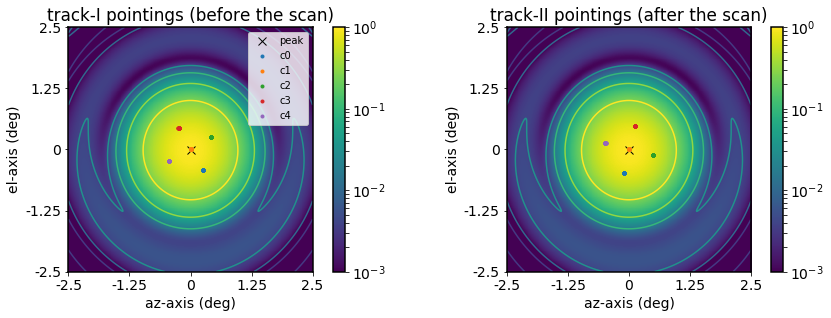

In [48]:
#show pointing position on beam pattern
# imshow pattern is y,x (el,az)
# plot pix_pos is x,y (az,el)
plt.figure(figsize = (15,4.5))
plt.subplots_adjust(wspace=0.1,hspace=0)
plt.subplot(121)
plt.contour(np.log10(pattern),color='w')
plt.imshow(pattern,norm=LogNorm(vmin=0.001, vmax=1))
plt.plot(x_pix_max,y_pix_max,'kx',ms=8)
plt.plot(x_pix[dp_c0a],y_pix[dp_c0a],'.')
plt.plot(x_pix[dp_c1a],y_pix[dp_c1a],'.')
#if fname in ['1551055211','1551037708','1579725085', '1580260015','1630519596']:
plt.plot(x_pix[dp_c2a],y_pix[dp_c2a],'.')
plt.plot(x_pix[dp_c3a],y_pix[dp_c3a],'.')
plt.plot(x_pix[dp_c4a],y_pix[dp_c4a],'.')
plt.gca().invert_yaxis()
plt.xticks([0,128,256,384,512],[-2.5,-1.25,0,1.25,2.5])
plt.yticks([0,128,256,384,512],[-2.5,-1.25,0,1.25,2.5])
plt.legend(['peak','c0','c1','c2','c3','c4'],fontsize=10)
plt.xlabel('az-axis (deg)')
plt.ylabel('el-axis (deg)')
plt.title('track-I pointings (before the scan)')
plt.colorbar()
plt.subplot(122)
plt.contour(np.log10(pattern),color='w')
plt.imshow(pattern,norm=LogNorm(vmin=0.001, vmax=1))
plt.plot(x_pix_max,y_pix_max,'kx',ms=8)
plt.plot(x_pix[dp_c0b],y_pix[dp_c0b],'.')
plt.plot(x_pix[dp_c1b],y_pix[dp_c1b],'.')
#if fname in ['1551055211','1551037708', '1579725085', '1580260015','1630519596']:
plt.plot(x_pix[dp_c2b],y_pix[dp_c2b],'.')
plt.plot(x_pix[dp_c3b],y_pix[dp_c3b],'.')
plt.plot(x_pix[dp_c4b],y_pix[dp_c4b],'.')
plt.gca().invert_yaxis()
plt.xticks([0,128,256,384,512],[-2.5,-1.25,0,1.25,2.5])
plt.yticks([0,128,256,384,512],[-2.5,-1.25,0,1.25,2.5])
#plt.legend(['peak','c0','c1','c2','c3','c4'],fontsize=10)
plt.xlabel('az-axis (deg)')
plt.ylabel('el-axis (deg)')
plt.title('track-II pointings (after the scan)')
plt.colorbar()
#plt.savefig('F_'+fname+'_pointing_on_beam.pdf', bbox_inches='tight')
plt.show()

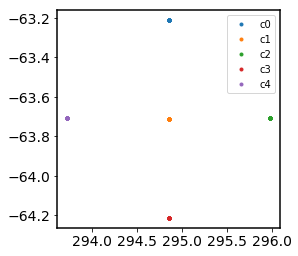

In [49]:
plt.figure(figsize=(4,4))
plt.plot(ra[dp_c0a],dec[dp_c0a],'.')
plt.plot(ra[dp_c1a],dec[dp_c1a],'.')
#if fname in ['1551055211','1551037708','1630519596']:
plt.plot(ra[dp_c2a],dec[dp_c2a],'.')
plt.plot(ra[dp_c3a],dec[dp_c3a],'.')
plt.plot(ra[dp_c4a],dec[dp_c4a],'.')
plt.legend(['c0','c1','c2','c3','c4'],fontsize=10)
plt.show()

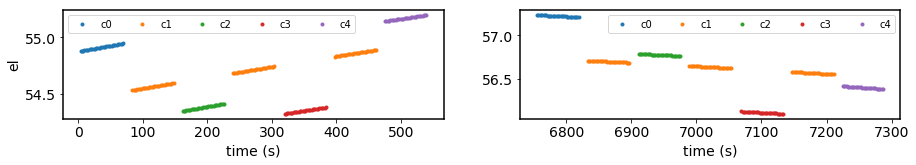

In [50]:
plt.figure(figsize=(15,2))
plt.subplot(121)
plt.plot(timestamps[dp_c0a]-timestamps[0],el[dp_c0a],'.')
plt.plot(timestamps[dp_c1a]-timestamps[0],el[dp_c1a],'.')
#if fname in ['1551055211','1551037708','1630519596']:
plt.plot(timestamps[dp_c2a]-timestamps[0],el[dp_c2a],'.')
plt.plot(timestamps[dp_c3a]-timestamps[0],el[dp_c3a],'.')
plt.plot(timestamps[dp_c4a]-timestamps[0],el[dp_c4a],'.')
plt.legend(['c0','c1','c2','c3','c4'],ncol=5, fontsize=10)
plt.xlabel('time (s)')
plt.ylabel('el')
plt.subplot(122)
plt.plot(timestamps[dp_c0b]-timestamps[0],el[dp_c0b],'.')
plt.plot(timestamps[dp_c1b]-timestamps[0],el[dp_c1b],'.')
#if fname in ['1551055211','1551037708','1630519596']:
plt.plot(timestamps[dp_c2b]-timestamps[0],el[dp_c2b],'.')
plt.plot(timestamps[dp_c3b]-timestamps[0],el[dp_c3b],'.')
plt.plot(timestamps[dp_c4b]-timestamps[0],el[dp_c4b],'.')
plt.legend(['c0','c1','c2','c3','c4'],ncol=5, fontsize=10)
plt.xlabel('time (s)')
plt.show()

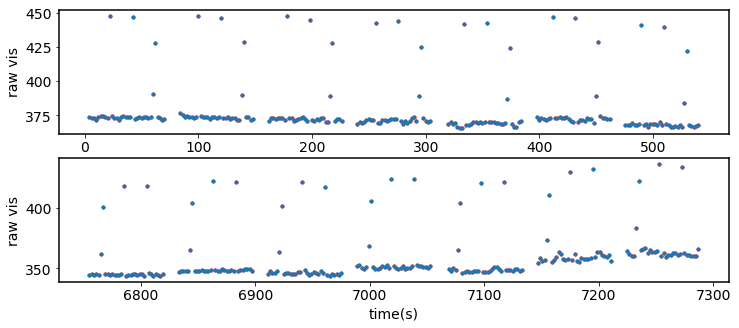

In [51]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(timestamps[dp_ca]-timestamps[0],vis[dp_ca,ch_plot],'r.')
plt.plot(timestamps[dp_ca]-timestamps[0],vis_clean[dp_ca,ch_plot],'.')
plt.xlabel('time(s)')
plt.ylabel('raw vis')
plt.subplot(212)
plt.plot(timestamps[dp_cb]-timestamps[0],vis[dp_cb,ch_plot],'r.')
plt.plot(timestamps[dp_cb]-timestamps[0],vis_clean[dp_cb,ch_plot],'.')
plt.xlabel('time(s)')
plt.ylabel('raw vis')
plt.show()


# extra bkg sources

In [52]:
#PKS 
PKS_freq_MHz=[408, 1410, 2700, 5000, 8400] 
PKS_flux_1934=[6.24, 16.4, 11.5, 6.13, 3] #Jy

def PKS_flux_table(src_label):
    if src_label==1922:
        PKS_flux=[4.88, 1.9, 1.21, 0.66, 0.3]
    if src_label==1936:
        PKS_flux=[2.79, 1.52, 1.3, 1.07, 0.5]
    if src_label==1924:    
        PKS_flux=[1.38, np.NaN, 0.28, 0.2, np.NaN] 
    if src_label==1921:
        PKS_flux=[1.59, np.NaN, 0.31, 0.19, np.NaN]
    if src_label==1927:
        PKS_flux=[1.61, np.NaN, 0.27, 0.21, np.NaN]
    if src_label==1913:
        PKS_flux=[2.36, np.NaN, 0.45, 0.26, np.NaN]
    if src_label==1919:
        PKS_flux=[1.53, np.NaN, 0.18, np.NaN, np.NaN]
    if src_label==1918:
        PKS_flux=[np.NaN, np.NaN, 0.36, 0.45, np.NaN]
    if src_label==1950:
        PKS_flux=[np.NaN, 1.5, 1.24, 0.77, 0.39]
    if src_label==1916:
        PKS_flux=[2.11, np.NaN, 0.15, np.NaN, np.NaN]
    if src_label==1854:
        PKS_flux=[4.41,1.2,0.87,0.37,0.19]
    return np.array(PKS_flux)

In [53]:
#bkg sources
def c0_bkgs(src_label):
    if src_label==1922:
        c0=SkyCoord(291.866721*u.deg, -62.659175*u.deg, frame='icrs')#PKS 1922-62
    if src_label==1936:
        c0=SkyCoord(295.340701*u.deg, -62.189181*u.deg, frame='icrs')#PKS 1936-623 
    if src_label==1924:
        c0=SkyCoord(292.258625*u.deg, -63.623028*u.deg, frame='icrs')#PKS 1924-637
    if src_label==1921:
        c0=SkyCoord(291.470917*u.deg, -62.660083*u.deg, frame='icrs')#PKS 1921-627
    if src_label==1927:
        c0=SkyCoord(293.164208*u.deg, -65.261028*u.deg, frame='icrs')#PKS 1927-653
    if src_label==1913:
        c0=SkyCoord(289.621833*u.deg, -66.769778*u.deg, frame='icrs')#PKS 1913-668
    if src_label==1919:
        c0=SkyCoord(291.126667*u.deg, -62.060306*u.deg, frame='icrs')#PKS 1919-621
    if src_label==1918:
        c0=SkyCoord(290.616647*u.deg, -63.273773*u.deg, frame='icrs')#PKS B1918-634
    if src_label==1950:
        c0=SkyCoord(298.794877*u.deg, -61.255316*u.deg, frame='icrs')#PKS 1950-613
    if src_label==1916:
        c0=SkyCoord(290.262208*u.deg, -62.290444*u.deg, frame='icrs')#PKS 1916-624
    if src_label==1854:
        c0=SkyCoord(284.991425*u.deg, -66.250633*u.deg, frame='icrs')#PKS 1854-66
    return c0

def flux_model_func(src_label):
    print (src_label,end='')
    if src_label in [1919,1918,1916]:
        order=1
    if src_label in [1924, 1921,1927,1913]:
        order=2
    if src_label in [1922,1950]:
        order=3
    if src_label in [1936,1854]:
        order=4
     
    PKS_freq_GHz=np.array([.408, 1.410, 2.700, 5.000, 8.400])
    PKS_flux=PKS_flux_table(src_label)
    
    l=np.where(~np.isnan(PKS_flux))[0]
    print (len(l))
    v,f=PKS_freq_GHz[l],PKS_flux[l] #np.NaN removed
    
    p = np.polyfit(np.log10(v),np.log10(f),order)
    
    def func(freq_list_GHz):
        return 10**np.polyval(p,np.log10(freq_list_GHz))
    
    return func


In [54]:
p = SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')

In [55]:
bkg_src=[1922,1936,1924,1921,1927,1913,1919,1918,1950,1916]

dp_ang_bkgs=[]
for src_i in bkg_src:
    c0_i=c0_bkgs(src_i)
    dp_ang_bkgs.append(p.separation(c0_i)/u.deg)
    

In [56]:
#set color for plot
cl={}
cl[1922]='C0'
cl[1936]='C1'
cl[1924]='C2'
cl[1921]='C3'
cl[1927]='C9'
cl[1913]='C5'
cl[1919]='C6'
cl[1918]='C7'
cl[1950]='C8'
cl[1916]='C4'
#cl[1854]='C0'
print (cl)

{1922: 'C0', 1936: 'C1', 1924: 'C2', 1921: 'C3', 1927: 'C9', 1913: 'C5', 1919: 'C6', 1918: 'C7', 1950: 'C8', 1916: 'C4'}


In [57]:
vlist_GHz=np.arange(.408,8.64,.1) #GHz

spec_cur=flux_model(vlist_GHz)

for src_i in bkg_src:
    bkgs_spec_cur=flux_model_func(src_i)(vlist_GHz)


19225
19365
19243
19213
19273
19133
19192
19182
19504
19162


plt1922
19225
plt1936
19365
plt1924
19243
plt1921
19213
plt1927
19273
plt1913
19133
plt1919
19192
plt1918
19182
plt1950
19504
plt1916
19162


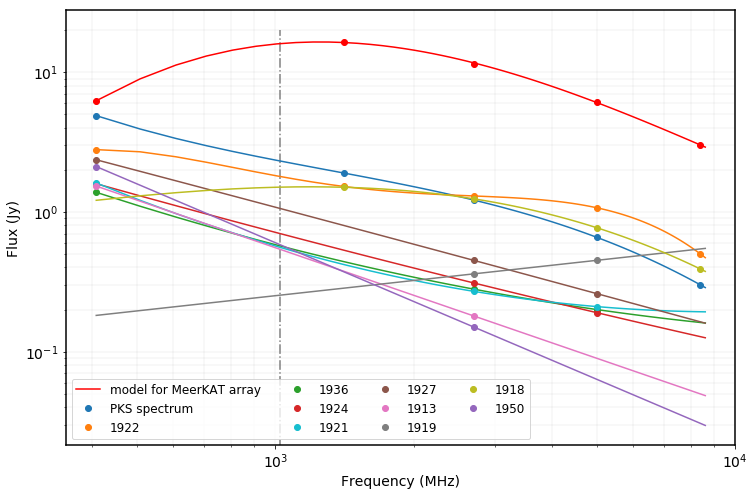

In [58]:
legend_list=['model for MeerKAT array','PKS spectrum']

plt.figure(figsize=(12,8))
#calibrator
plt.plot(PKS_freq_MHz,PKS_flux_1934,'ro')
line,=plt.plot(vlist_GHz*1e3,spec_cur, c='r')
show_legend=[line]
#bkg sources
for i in range(len(bkg_src)):
    src_i=bkg_src[i]
    plt_name = 'plt' + str(src_i)
    print (plt_name)
    flux_model_bkgs=flux_model_func(src_i) #output is a func
    if i<10:
        plt_name,=plt.plot(PKS_freq_MHz,PKS_flux_table(src_i),'o',color=cl[src_i])
        plt.plot(vlist_GHz*1e3,flux_model_bkgs(vlist_GHz),'-',color=cl[src_i])
    if i>=10:
        plt_name,=plt.plot(PKS_freq_MHz,PKS_flux_table(src_i),'s',color=cl[src_i])
        plt.plot(vlist_GHz*1e3,flux_model_bkgs(vlist_GHz),'-.',color=cl[src_i])
        
    legend_list.append(src_i)
    show_legend.append(plt_name)

plt.plot([freqs[ch_plot]/1e6,freqs[ch_plot]/1e6],[0,20],'-.',color='grey',zorder=0)
plt.grid(True, which="both",color='grey', lw=.1)
plt.xlim(350,1e4)
plt.loglog()
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Jy)')
plt.legend(show_legend,legend_list,fontsize=12,ncol=4)
plt.show()

In [59]:
beam_select='me'

In [60]:
#for bkg sources,a lerger beam pattern allpied

Npix_large=257
Ddeg_large=10
pattern_10d_fband=kb.load_pattern_10d_fband(beam_select,pol)
Aeff_max_fband=kb.load_Aeff_max_fband(beam_select,pol)
pattern_large=pattern_10d_fband[ch_plot,:,:]



/users/jywang/MeerKAT/model_test/beam_model/eidos_sim/p257_d10_ch4096/primary_beam_me_p257_ch4096_d10_VV.fits


In [61]:
data.ants

[<katpoint.Antenna 'm050' diam=13.5m at 0x7efeaca8ac50>]

19225
(3647,) (3647,)


/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10
/usr/lib/python3/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


128.0 128.0
129.06204795082007
(array([128]), array([128]))
128 128
19365
(3647,) (3647,)
128.0 128.0
129.06204795082007
(array([128]), array([128]))
128 128
19243
(3647,) (3647,)
128.0 128.0
129.06204795082007
(array([128]), array([128]))
128 128
19213
(3647,) (3647,)
128.0 128.0
129.06204795082007
(array([128]), array([128]))
128 128
19273
(3647,) (3647,)
128.0 128.0
129.06204795082007
(array([128]), array([128]))
128 128
19133
(3647,) (3647,)
128.0 128.0
129.06204795082007
(array([128]), array([128]))
128 128
19192
(3647,) (3647,)
128.0 128.0
129.06204795082007
(array([128]), array([128]))
128 128
19182
(3647,) (3647,)
128.0 128.0
129.06204795082007
(array([128]), array([128]))
128 128
19504
(3647,) (3647,)
128.0 128.0
129.06204795082007
(array([128]), array([128]))
128 128
19162
(3647,) (3647,)
128.0 128.0
129.06204795082007
(array([128]), array([128]))
128 128


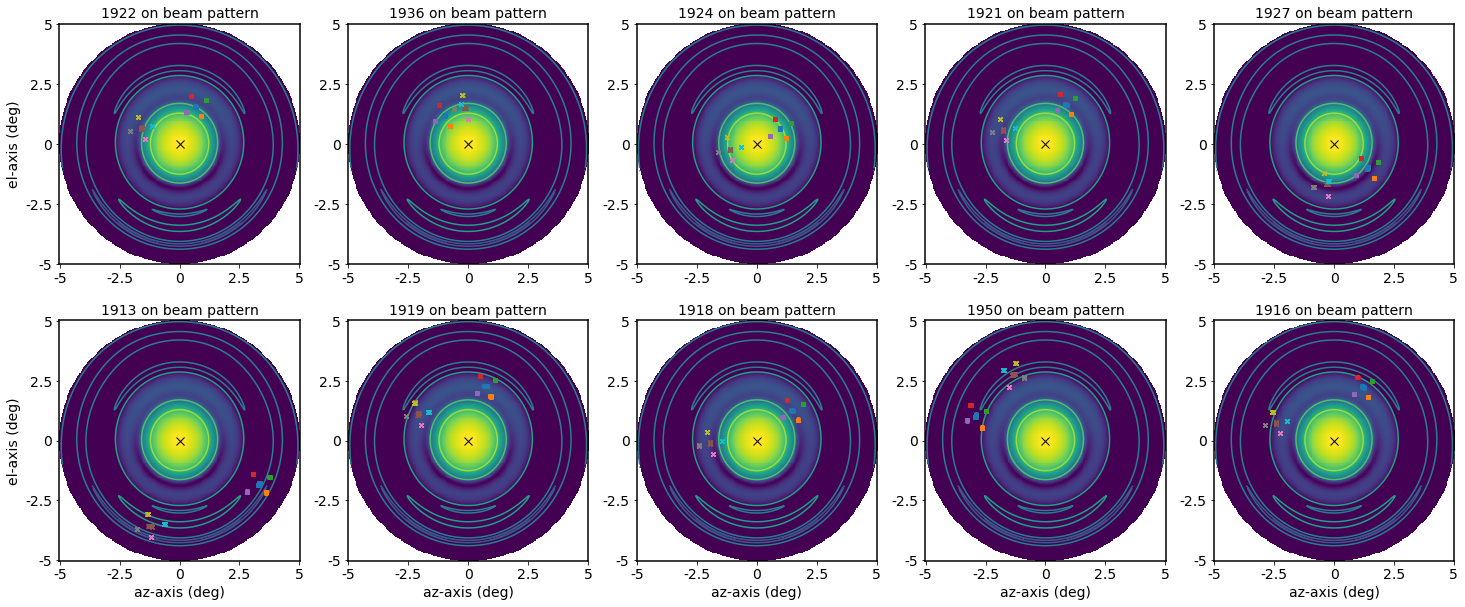

In [62]:
Tptr_bkgs_table=[]

#plt.figure(figsize = (5*len(bkg_src),5))
plt.figure(figsize = (2.5*len(bkg_src),10))
for i in range(len(bkg_src)):
    src_i=bkg_src[i]
    
    flux_model_bkgs=flux_model_func(src_i) #output is a func
    
    x_pix_bkgs,y_pix_bkgs=kb.cal_pix_params(data,c0_bkgs(src_i),Npix_large,Ddeg_large, key=0)
    Tptr_bkgs,pattern_bkgs,x_pix_max_bkgs,y_pix_max_bkgs=kb.cal_BMIII_10d_1ch(data,ch_plot,flux_model_bkgs, dp_t,[],
                                                                      pattern_10d_fband,x_pix_bkgs,y_pix_bkgs,Aeff_max_fband)
    Tptr_bkgs_table.append(Tptr_bkgs)
    #legend_list=['peak']
    #plt.subplot(1,len(bkg_src),i+1)
    plt.subplot(2,len(bkg_src)/2,i+1)
    plt.contour(np.log10(pattern_large),color='w')
    plt.imshow(pattern_large,norm=LogNorm(vmin=0.001, vmax=1))
    plt.plot(x_pix_max_bkgs,y_pix_max_bkgs,'kx',ms=8)
    for ii in range(len(dp_list1)):
        dp_local=dp_list1[ii]
        plt.plot(x_pix_bkgs[dp_local],y_pix_bkgs[dp_local],'o',ms=4)
        
    for ii in range(len(dp_list2)):
        dp_local=dp_list2[ii]
        plt.plot(x_pix_bkgs[dp_local],y_pix_bkgs[dp_local],'x',ms=4)
        
    plt.gca().invert_yaxis()
    plt.xticks([0,64,128,192,256],[-5,-2.5,0,2.5,5])
    plt.yticks([0,64,128,192,256],[-5,-2.5,0,2.5,5])
    
    if i>=len(bkg_src)/2:
        plt.xlabel('az-axis (deg)')
    if i==0 or i==len(bkg_src)/2:
        plt.ylabel('el-axis (deg)')
    plt.title(str(src_i)+' on beam pattern',fontsize=14)
    #plt.colorbar()
    #plt.savefig('F_'+fname+'_pointing_on_beam_'+pol+'.pdf', bbox_inches='tight')
plt.show()

Tptr_bkgs_table=np.array(Tptr_bkgs_table)

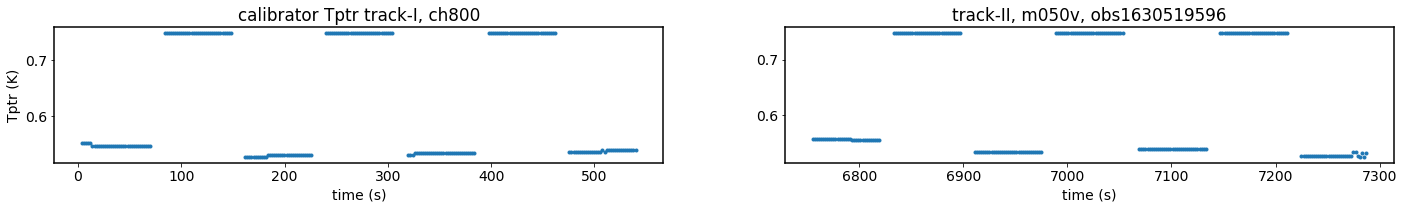

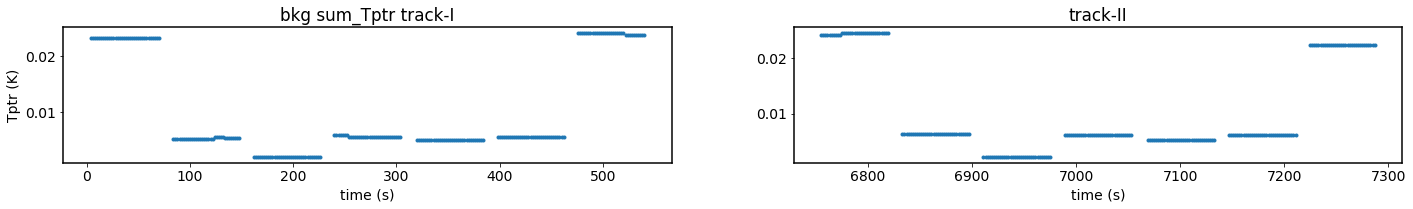

In [63]:
#legend_list=[]
plt.figure(figsize=(24,2.5))
plt.subplot(121)
plt.plot(timestamps[dp_ca]-timestamps[0],T_ptr2[dp_ca],'.')
plt.ylabel('Tptr (K)')
plt.title('calibrator Tptr track-I, ch'+str(ch_plot))
plt.xlabel('time (s)')
plt.subplot(122)
plt.plot(timestamps[dp_cb]-timestamps[0],T_ptr2[dp_cb],'.')
plt.title('track-II, '+recv+', obs'+fname)
plt.xlabel('time (s)')
plt.show()

#legend_list=[]
plt.figure(figsize=(24,2.5))
plt.subplot(121)
if len(bkg_src)>0:
    plt.plot(timestamps[dp_ca]-timestamps[0],np.sum(Tptr_bkgs_table,axis=0)[dp_ca],'.')
plt.ylabel('Tptr (K)')
plt.title('bkg sum_Tptr track-I')
plt.xlabel('time (s)')
plt.subplot(122)
if len(bkg_src)>0:
    plt.plot(timestamps[dp_cb]-timestamps[0],np.sum(Tptr_bkgs_table,axis=0)[dp_cb],'.')
plt.title('track-II')
plt.xlabel('time (s)')
plt.show()

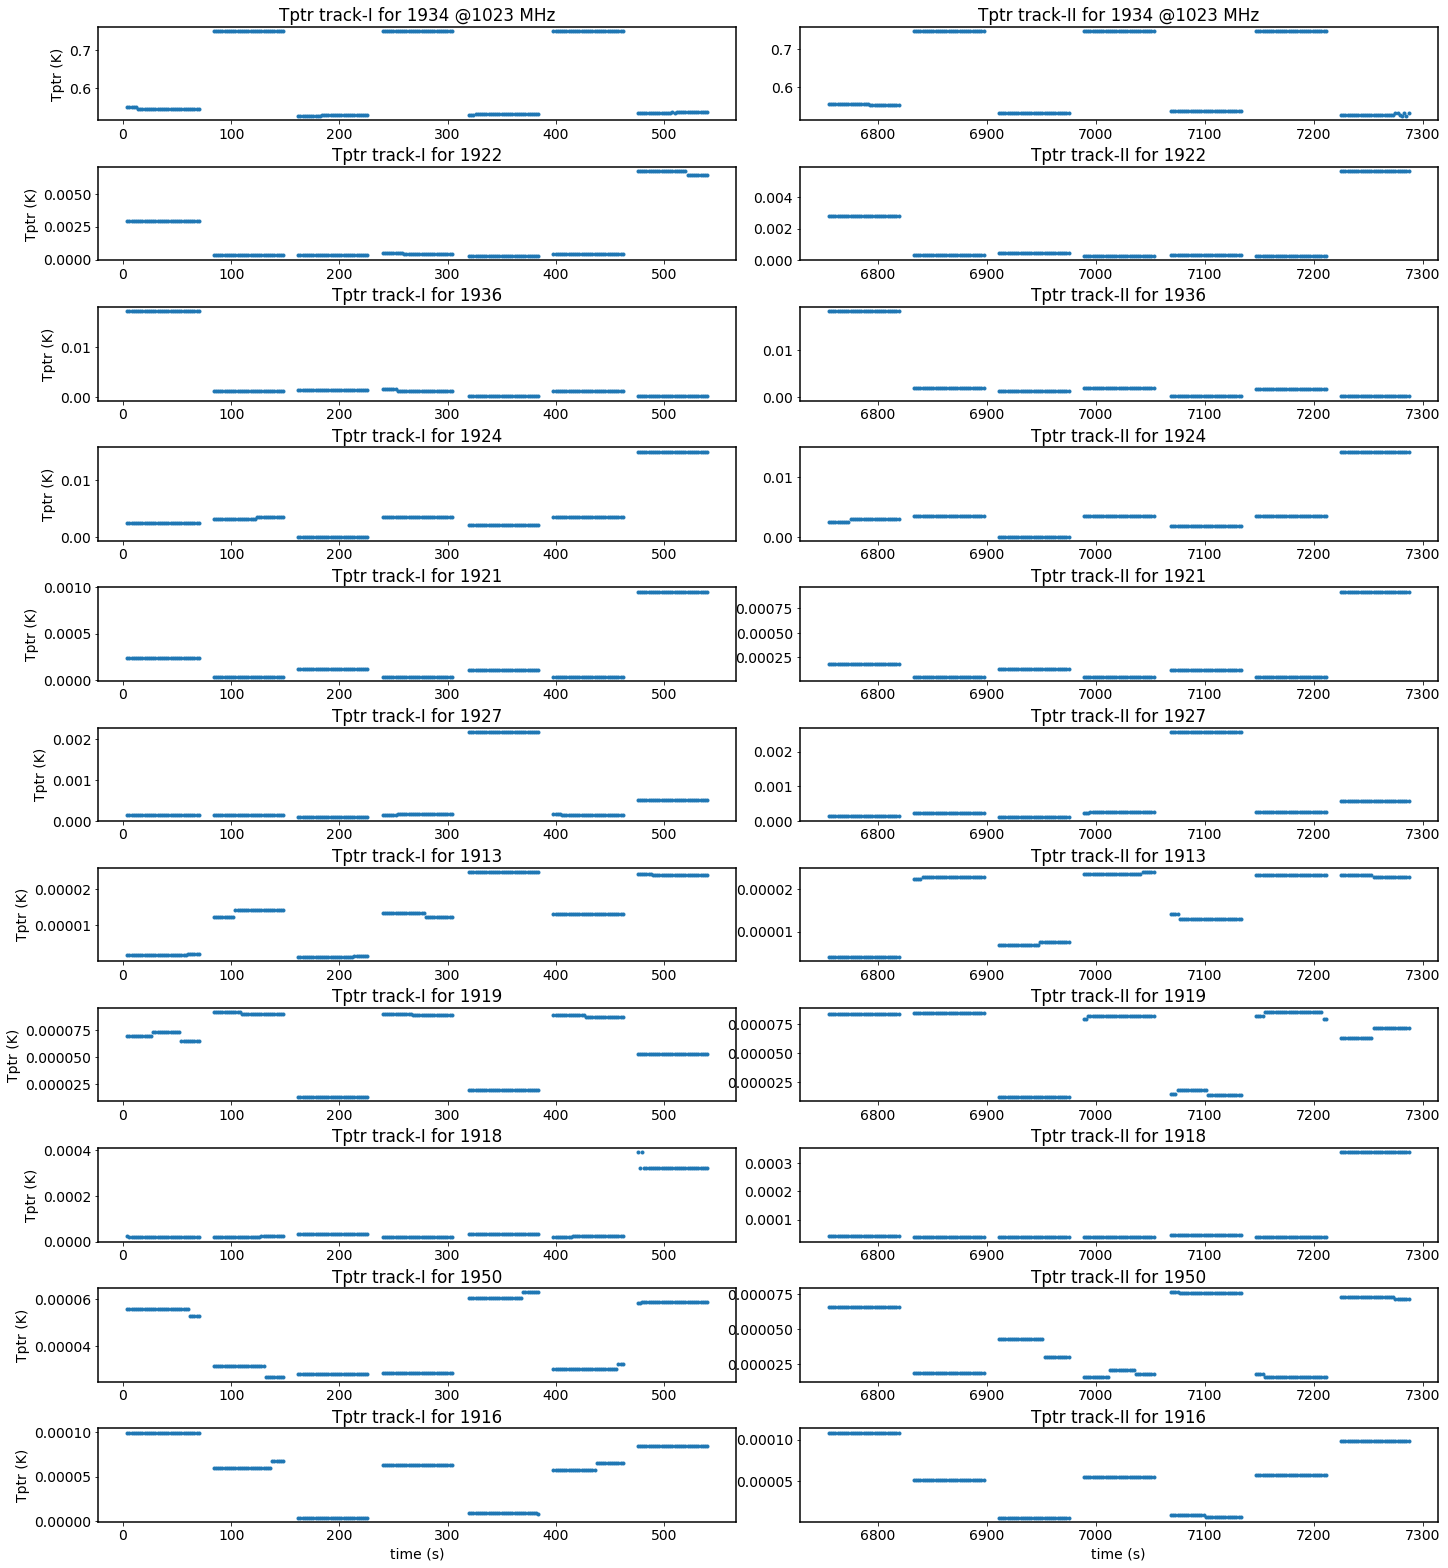

In [64]:
plt.figure(figsize=(24,2.5*(len(bkg_src)+1)))
plt.subplots_adjust(wspace=0.1,hspace=0.5)

plt.subplot(len(bkg_src)+1,2,1)
plt.plot(timestamps[dp_ca]-timestamps[0],T_ptr2[dp_ca],'.')
plt.ylabel('Tptr (K)')
plt.title('Tptr track-I for 1934 @'+str(round(freqs[ch_plot]/1e6))+' MHz')

plt.subplot(len(bkg_src)+1,2,2)
plt.plot(timestamps[dp_cb]-timestamps[0],T_ptr2[dp_cb],'.')
plt.title('Tptr track-II for 1934 @'+str(round(freqs[ch_plot]/1e6))+' MHz')

for i in range(len(bkg_src)):
    plt.subplot(len(bkg_src)+1,2,2*i+3)

    plt.plot(timestamps[dp_ca]-timestamps[0],Tptr_bkgs_table[i,dp_ca],'.')
    plt.ylabel('Tptr (K)')
    plt.title('Tptr track-I for '+str(bkg_src[i]))
    if i==len(bkg_src)-1:
        plt.xlabel('time (s)')
        
    plt.subplot(len(bkg_src)+1,2,2*i+4)

    plt.plot(timestamps[dp_cb]-timestamps[0],Tptr_bkgs_table[i,dp_cb],'.')
    plt.title('Tptr track-II for '+str(bkg_src[i]))
    if i==len(bkg_src)-1:
        plt.xlabel('time (s)')
plt.show()


l 4035


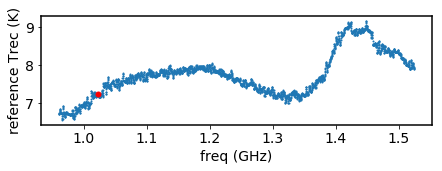

In [65]:
Trec_list=km.cal_Trec(data,ant,pol,freqs)
plt.figure(figsize=(7,2))
plt.plot(freqs[500:3200]/1e9,Trec_list[500:3200],'.',ms=2)
plt.plot(freqs[ch_plot]/1e9,Trec_list[ch_plot],'ro',ms=5)
plt.xlabel('freq (GHz)')
plt.ylabel('reference Trec (K)')
plt.show()

In [66]:
#Galactic model
nside=64 #healpix nside, 64: Mean Spacing (deg) is 0.9161
#gal_ori=km.cal_Gal_model_np(vis, freqs, ra, dec, ch_plot, ch_plot+1, nside)
gal_ori=km.cal_Gal_model_np2(vis, freqs, ra, dec, 0, len(freqs), nside, model_key=-1)
print ('#Gal model is from Halsam!!!')
gal_ori.flags.writeable=False #avoid change by mistake
gal=gal_ori.copy() #will change for some track data

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
# haslam408_dsds_Remazeilles2014.fits loaded...
# synch_beta.fits loaded...
(3145728,) (49152,)
#Gal model is from Halsam!!!


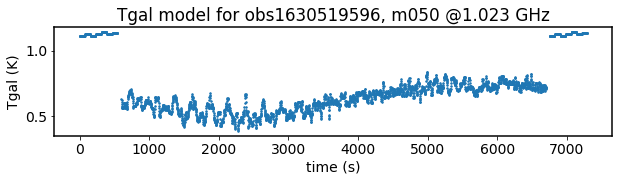

In [67]:
plt.figure(figsize=(10,2))
plt.plot(data.timestamps[dp_u]-data.timestamps[0],gal[dp_u,ch_plot],'.',ms=3)
plt.xlabel('time (s)')
plt.ylabel('Tgal (K)')
plt.title('Tgal model for obs'+str(fname)+', '+str(ant)+' @'+str(round(data.freqs[ch_plot]/1e9,3))+' GHz')
plt.show()

In [68]:
dp_gal=list(dp_c1a)+list(dp_c1b)

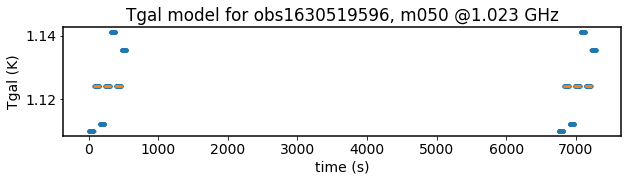

In [69]:
plt.figure(figsize=(10,2))
plt.plot(data.timestamps[dp_tt]-data.timestamps[0],gal[dp_tt,ch_plot],'o',ms=3)
plt.plot(data.timestamps[dp_gal]-data.timestamps[0],gal[dp_gal,ch_plot],'.',ms=3)
plt.xlabel('time (s)')
plt.ylabel('Tgal (K)')
plt.title('Tgal model for obs'+str(fname)+', '+str(ant)+' @'+str(round(data.freqs[ch_plot]/1e9,3))+' GHz')
plt.show()

In [70]:
gal=gal_ori.copy()
'''
gal_reset=np.mean(gal_ori[dp_gal,ch_plot])
print gal_reset
gal[dp_tt,ch_plot]=np.ones_like(gal_ori[dp_tt,ch_plot])*gal_reset
'''
Tgal=gal[:,ch_plot]


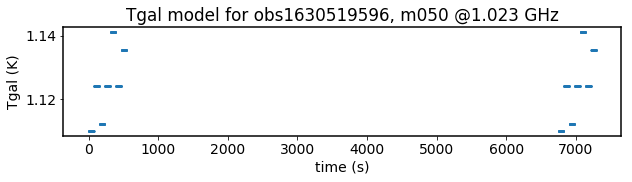

In [71]:
plt.figure(figsize=(10,2))
plt.plot(data.timestamps[dp_tt]-data.timestamps[0],gal[dp_tt,ch_plot],'.',ms=3)
plt.xlabel('time (s)')
plt.ylabel('Tgal (K)')
plt.title('Tgal model for obs'+str(fname)+', '+str(ant)+' @'+str(round(data.freqs[ch_plot]/1e9,3))+' GHz')
plt.show()

## calibrate diode noise

In [72]:
#####choose beam model
T_ptr=T_ptr2 #BM-III 
#T_ptr=T_ptr2+np.sum(Tptr_bkgs_table,axis=0)

### track before scan########################


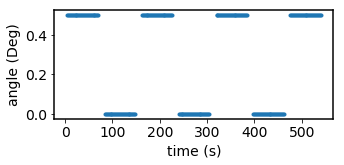

In [73]:
#check angular distance
plt.figure(figsize=(5,2))
plt.plot(timestamps[dp_ca]-timestamps[0],ang_deg[dp_ca],'.')
plt.xlabel('time (s)')
plt.ylabel('angle (Deg)')
plt.show()


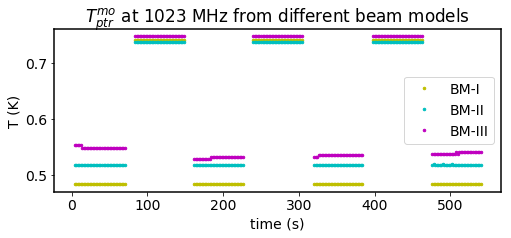

In [74]:
#check Tptr from different model

plt.figure(figsize=(8,3))
plt.plot(timestamps[dp_ca]-timestamps[0],T_ptr0[dp_ca],'y.',ms=5)
plt.plot(timestamps[dp_ca]-timestamps[0],T_ptr1[dp_ca],'c.',ms=5)
plt.plot(timestamps[dp_ca]-timestamps[0],T_ptr2[dp_ca],'m.',ms=5)
plt.xlabel('time (s)')
plt.ylabel('T (K)')
plt.title('$T_{ptr}^{mo}$ at '+str(int(freqs[ch_plot]/1e6))+' MHz from different beam models')
plt.legend(['BM-I', 'BM-II', 'BM-III'])
#plt.savefig('F_'+fname+'_ptr_contri_model.pdf', bbox_inches='tight')
plt.show()

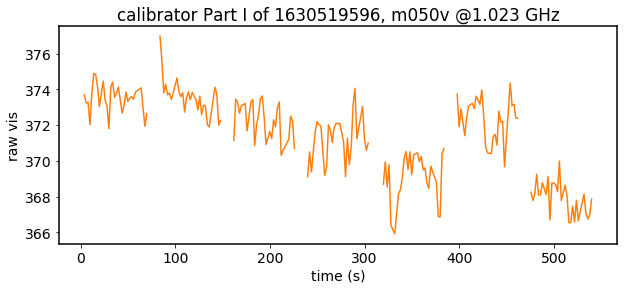

In [75]:
#select raw vis for track befor scan
visa_ptr = vis_clean.copy()
#visa_ptr_raw = np.ma.array(vis_backup.copy(),mask=flags)
for i in range(len(timestamps)):
    if i not in dp_ca:
        visa_ptr.mask[i,:]=True
        #visa_ptr_raw.mask[i,:]=True
#show diode off data
plt.figure(figsize=(10,4))

plt.plot(timestamps[nd_0]-timestamps[0],visa_ptr[nd_0,ch_plot],c='C1')
#plt.plot(timestamps[nd_0]-timestamps[0],visa_ptr_raw[nd_0,ch_plot],c='grey',zorder=0)
plt.xlabel('time (s)')
plt.ylabel('raw vis')
#plt.legend(['raw data to be fitted','raw data'],ncol=2, fontsize=12)
plt.title('calibrator Part I of '+str(fname)+', '+str(recv)+ ' @'+ str(round(freqs[ch_plot]/1e9,3)) +' GHz')
plt.show()

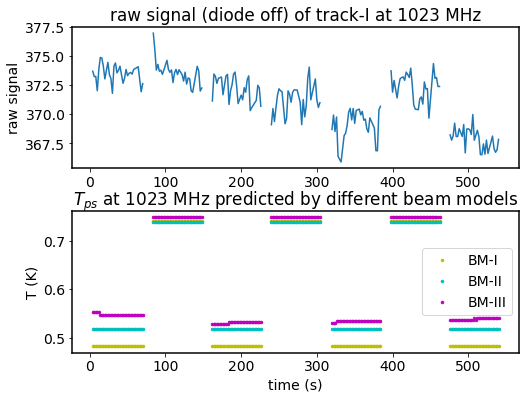

In [76]:
#check Tptr from different model

plt.figure(figsize=(8,6))
plt.subplots_adjust(wspace =0, hspace =0.3)
plt.subplot(211)
plt.plot(timestamps[nd_0]-timestamps[0],visa_ptr[nd_0,ch_plot])
#plt.xlabel('time (s)')
plt.ylabel('raw signal')
plt.title('raw signal (diode off) of track-I at '+ str(int(freqs[ch_plot]/1e6)) +' MHz')
plt.subplot(212)
plt.plot(timestamps[dp_ca]-timestamps[0],T_ptr0[dp_ca],'y.',ms=5)
plt.plot(timestamps[dp_ca]-timestamps[0],T_ptr1[dp_ca],'c.',ms=5)
plt.plot(timestamps[dp_ca]-timestamps[0],T_ptr2[dp_ca],'m.',ms=5)
plt.xlabel('time (s)')
plt.ylabel('T (K)')
plt.title('$T_{ps}$ at '+str(int(freqs[ch_plot]/1e6))+' MHz predicted by different beam models')
plt.legend(['BM-I', 'BM-II', 'BM-III'])
plt.savefig('F_'+fname+'_ptr_contri_model.pdf', bbox_inches='tight')
plt.show()

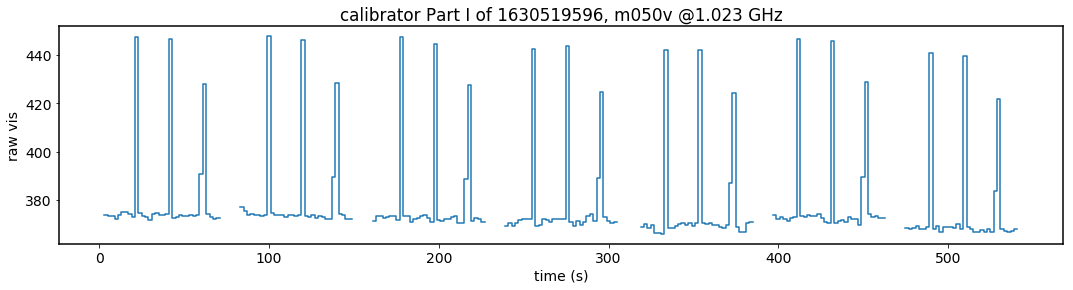

In [77]:
#diode on and diode off 
plt.figure(figsize=(18,4))
plt.step(timestamps-timestamps[0],visa_ptr[:,ch_plot],where='mid')
plt.xlabel('time (s)')
plt.ylabel('raw vis')
plt.title('calibrator Part I of '+str(fname)+', '+str(recv)+ ' @'+ str(round(freqs[ch_plot]/1e9,3)) +' GHz')
plt.show()

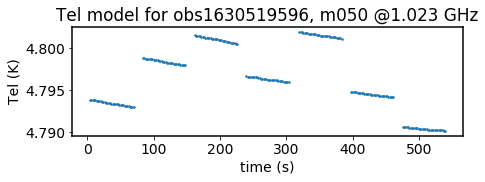

In [78]:
#show Tel for track before scan
plt.figure(figsize=(7,2))
plt.plot(data.timestamps[dp_ca]-data.timestamps[0],Tel[dp_ca],'.',ms=3)
plt.xlabel('time (s)')
plt.ylabel('Tel (K)')
plt.title('Tel model for obs'+str(fname)+', '+str(ant)+' @'+str(round(data.freqs[ch_plot]/1e9,3))+' GHz')
plt.show()

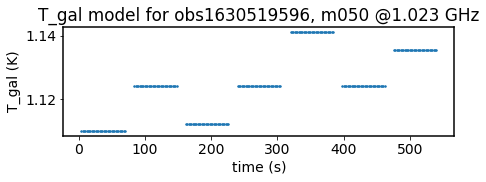

In [79]:
#show Tgal for track efor scan
#Tgal=gal[:,ch_plot]
plt.figure(figsize=(7,2))
plt.plot(data.timestamps[dp_ca]-data.timestamps[0],Tgal[dp_ca],'.',ms=3)
plt.xlabel('time (s)')
plt.ylabel('T_gal (K)')
plt.title('T_gal model for obs'+str(fname)+', '+str(ant)+' @'+str(round(data.freqs[ch_plot]/1e9,3))+' GHz')
plt.show()
plt.show()

In [80]:
####set input parameters
ga0,gb0=ks.cal_gain0(fname,data,ant,pol,flags,ch_plot,dp_tt,dp_ss,ang_deg,T_ptr,vis_clean,n_src_off=4,target_start=target_start) #gain level ##need to check the label still works for 2021 data!!!!!!
print (ga0,gb0)
assert(isinstance(ga0,np.float))
assert(isinstance(gb0,np.float))

deg filter start: 0.5000162915446345+/-7.444766482344135e-05
deg filter end: 0.5000162915446345+/-7.444766482344135e-05

deg filter start: 0.0001408887618809211+/-7.349222789538585e-05
deg filter end: 0.0001408887618809211+/-7.349222789538585e-05

deg filter start: 0.5000186219887516+/-0.00010221829936453044
deg filter end: 0.5000186219887516+/-0.00010221829936453044

deg filter start: 0.49999330487737553+/-8.933859480614928e-05
deg filter end: 0.49999330487737553+/-8.933859480614928e-05

deg filter start: 0.4999678336580414+/-0.00014249236587596893
deg filter end: 0.4999678336580414+/-0.00014249236587596893

# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 36 -> 34
# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 35 -> 33
# edge drop applied: 35

In [81]:
Trec0=Trec_list[ch_plot]
print (Trec0)
eta_p0=1.0
func_sm_param0=[Trec0]
func_gt_param0=[ga0,0,0,0,0]
print (Tnd_ref)
####fitting
instru_pa=ks.solve_params0_v3(timestamps, visa_ptr, ch_plot, nd_ratio, T_ptr, eta_p0, Tnd_ref, Tnd_std, Tel, Tgal, func_gt_param0, func_sm_param0, nd_0, nd_1x)


####get fitting result
Tnda=instru_pa[0]
eta_pa=instru_pa[1]
sma=instru_pa[2]
gta=instru_pa[3:]

print (Tnda, eta_pa, sma, gta)


7.238493652343751
23.07245815127522
Optimization terminated successfully.
         Current function value: 1218.445222
         Iterations: 34
         Function evaluations: 5516
25.06204001280865 1.0 9.407772350448145 [20.87487189  0.30574875 -0.56732819  1.56081343  1.67299097]


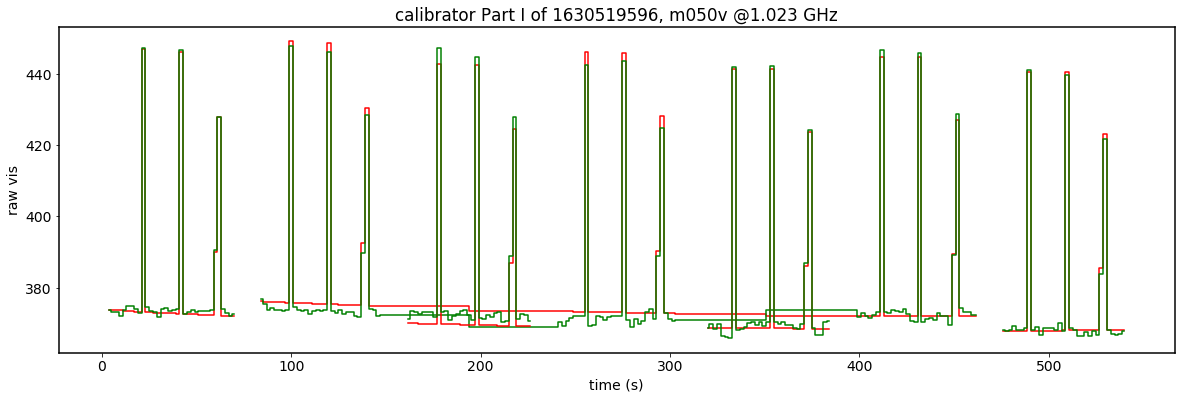

In [82]:
##show model and raw vis
plt.figure(figsize=(20,6))
m=ks.calc_total_model_v3(timestamps, nd_ratio, T_ptr, eta_pa, Tnda, Tel, Tgal, gta, sma, nd_0, nd_1x)
m=np.ma.array(m,mask=visa_ptr[:,ch_plot].mask)
plt.step(timestamps[dp_c0a]-timestamps[0],m[dp_c0a],'r-',where='mid')
plt.step(timestamps[dp_c1a]-timestamps[0],m[dp_c1a],'r-',where='mid')

plt.step(timestamps[dp_c0a]-timestamps[0],visa_ptr[dp_c0a,ch_plot],'g-',where='mid')
plt.step(timestamps[dp_c1a]-timestamps[0],visa_ptr[dp_c1a,ch_plot],'g-',where='mid')
#if fname in ['1551055211','1551037708','1630519596']:
plt.step(timestamps[dp_c2a]-timestamps[0],m[dp_c2a],'r-',where='mid')
plt.step(timestamps[dp_c3a]-timestamps[0],m[dp_c3a],'r-',where='mid')
plt.step(timestamps[dp_c4a]-timestamps[0],m[dp_c4a],'r-',where='mid')
plt.step(timestamps[dp_c2a]-timestamps[0],visa_ptr[dp_c2a,ch_plot],'g-',where='mid')
plt.step(timestamps[dp_c3a]-timestamps[0],visa_ptr[dp_c3a,ch_plot],'g-',where='mid')
plt.step(timestamps[dp_c4a]-timestamps[0],visa_ptr[dp_c4a,ch_plot],'g-',where='mid')
plt.xlabel('time (s)')
plt.ylabel('raw vis')
plt.title('calibrator Part I of '+str(fname)+', '+str(recv)+ ' @'+ str(round(freqs[ch_plot]/1e9,3)) +' GHz')
plt.show()

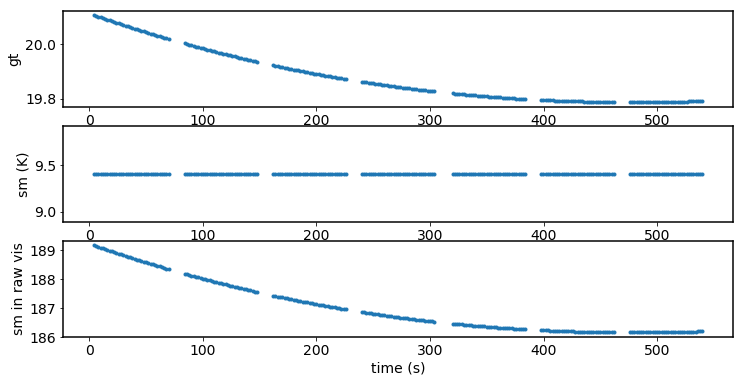

In [83]:
#show curves for fitting parameters
plt.figure(figsize=(12,6))
plt.subplot(311)
plt.plot(timestamps[dp_ca]-timestamps[0],ks.func_gt(timestamps,gta)[dp_ca],'.')
plt.ylabel('gt')
plt.subplot(312)
plt.plot(timestamps[dp_ca]-timestamps[0],ks.func_sm(timestamps,sma)[dp_ca],'.')
plt.ylabel('sm (K)')
plt.subplot(313)
plt.plot(timestamps[dp_ca]-timestamps[0],ks.func_gt(timestamps,gta)[dp_ca]*ks.func_sm(timestamps,sma)[dp_ca],'.')
plt.xlabel('time (s)')
plt.ylabel('sm in raw vis')
plt.show()

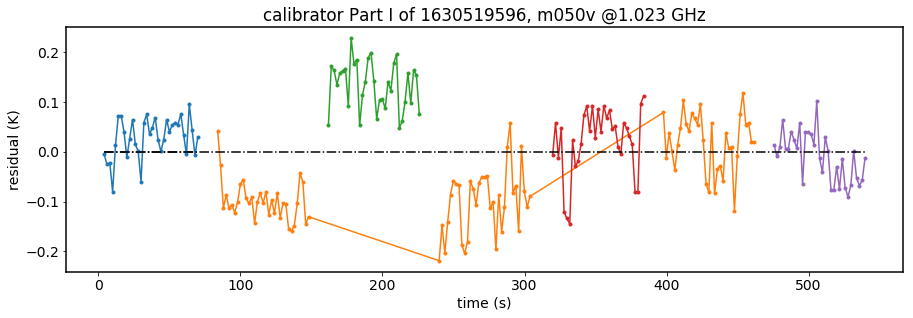

In [84]:
#show residuals
plt.figure(figsize=(15,4.5))
g=ks.func_gt(timestamps,gta)
m=ks.calc_total_model_v3(timestamps, nd_ratio, T_ptr, eta_pa, Tnda, Tel, Tgal, gta, sma, nd_0, nd_1x)
plt.plot([timestamps[dp_c0a][0]-timestamps[0],timestamps[dp_c0a][-1]-timestamps[0]],[0,0],'k-.')
plt.plot(timestamps[dp_c0a]-timestamps[0],(visa_ptr[dp_c0a,ch_plot]-m[dp_c0a])/g[dp_c0a],'.-')
plt.plot(timestamps[dp_c1a]-timestamps[0],(visa_ptr[dp_c1a,ch_plot]-m[dp_c1a])/g[dp_c1a],'.-')
#if fname in ['1551055211','1551037708','1579725085', '1580260015','1630519596']:
plt.plot(timestamps[dp_c2a]-timestamps[0],(visa_ptr[dp_c2a,ch_plot]-m[dp_c2a])/g[dp_c2a],'.-')
plt.plot(timestamps[dp_c3a]-timestamps[0],(visa_ptr[dp_c3a,ch_plot]-m[dp_c3a])/g[dp_c3a],'.-')
plt.plot(timestamps[dp_c4a]-timestamps[0],(visa_ptr[dp_c4a,ch_plot]-m[dp_c4a])/g[dp_c4a],'.-')
plt.plot([timestamps[dp_c0a][0]-timestamps[0],timestamps[dp_c4a][-1]-timestamps[0]],[0,0],'k-.')
plt.xlabel('time (s)')
plt.ylabel('residual (K)')
plt.title('calibrator Part I of '+str(fname)+', '+str(recv)+ ' @'+ str(round(freqs[ch_plot]/1e9,3)) +' GHz')
#plt.savefig('caliA_ch'+str(ch_plot)+'.pdf')
plt.show()


### track after scan########################


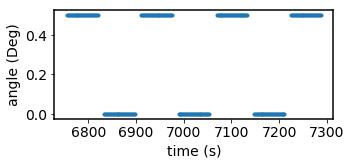

In [85]:
#check angular distance
plt.figure(figsize=(5,2))
plt.plot(timestamps[dp_cb]-timestamps[0],ang_deg[dp_cb],'.')
plt.xlabel('time (s)')
plt.ylabel('angle (Deg)')
plt.show()


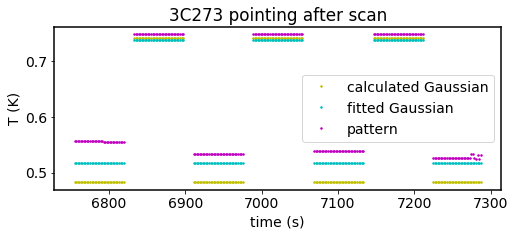

In [86]:
#check Tptr from different model

plt.figure(figsize=(8,3))
plt.plot(timestamps[dp_cb]-timestamps[0],T_ptr0[dp_cb],'y.',ms=3)
plt.plot(timestamps[dp_cb]-timestamps[0],T_ptr1[dp_cb],'c.',ms=3)
plt.plot(timestamps[dp_cb]-timestamps[0],T_ptr2[dp_cb],'m.',ms=3)
plt.xlabel('time (s)')
plt.ylabel('T (K)')
plt.title('3C273 pointing after scan')
plt.legend(['calculated Gaussian', 'fitted Gaussian', 'pattern'])
plt.show()

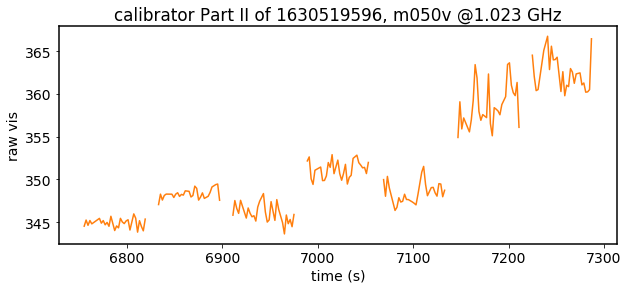

In [87]:
#select raw vis for track befor scan
visb_ptr = vis_clean.copy()
#visb_ptr_raw = np.ma.array(vis_backup.copy(),mask=flags)
for i in range(len(timestamps)):
    if i not in dp_cb:
        visb_ptr.mask[i,:]=True
        #visb_ptr_raw.mask[i,:]=True
#show diode off data
plt.figure(figsize=(10,4))

plt.plot(timestamps[nd_0]-timestamps[0],visb_ptr[nd_0,ch_plot],c='C1')
#plt.plot(timestamps[nd_0]-timestamps[0],visb_ptr_raw[nd_0,ch_plot],c='grey',zorder=0)
plt.xlabel('time (s)')
plt.ylabel('raw vis')
#plt.legend(['raw data to be fitted','raw data'],ncol=2, fontsize=12)
plt.title('calibrator Part II of '+str(fname)+', '+str(recv)+ ' @'+ str(round(freqs[ch_plot]/1e9,3)) +' GHz')
plt.show()

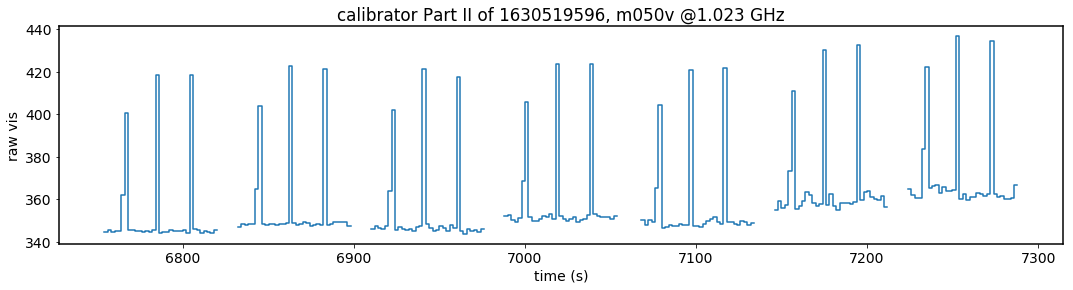

In [88]:
#diode on and diode off 
plt.figure(figsize=(18,4))
plt.step(timestamps-timestamps[0],visb_ptr[:,ch_plot],where='mid')
plt.xlabel('time (s)')
plt.ylabel('raw vis')
plt.title('calibrator Part II of '+str(fname)+', '+str(recv)+ ' @'+ str(round(freqs[ch_plot]/1e9,3)) +' GHz')
plt.show()

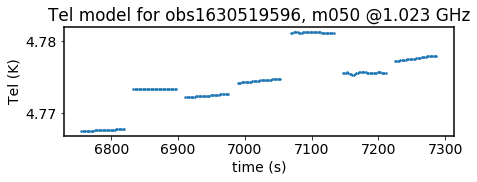

In [89]:
#show Tel for track after scan
plt.figure(figsize=(7,2))
plt.plot(data.timestamps[dp_cb]-data.timestamps[0],Tel[dp_cb],'.',ms=3)
plt.xlabel('time (s)')
plt.ylabel('Tel (K)')
plt.title('Tel model for obs'+str(fname)+', '+str(ant)+' @'+str(round(data.freqs[ch_plot]/1e9,3))+' GHz')
plt.show()

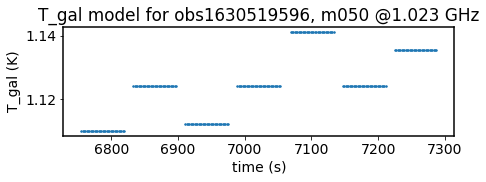

In [90]:
#show Tgal for track after scan
plt.figure(figsize=(7,2))
plt.plot(data.timestamps[dp_cb]-data.timestamps[0],Tgal[dp_cb],'.',ms=3)
plt.xlabel('time (s)')
plt.ylabel('T_gal (K)')
plt.title('T_gal model for obs'+str(fname)+', '+str(ant)+' @'+str(round(data.freqs[ch_plot]/1e9,3))+' GHz')
plt.show()
plt.show()

In [91]:
####set input parameters
#Trec0=Trec_list[ch_plot]
print (Trec0)
eta_p0=1.0
func_sm_param0=[Trec0]
func_gt_param0=[gb0,0,0,0,0]

print (Tnd_ref)

####fitting######
instru_pb=ks.solve_params0_v3(timestamps, visb_ptr, ch_plot, nd_ratio, T_ptr, eta_p0, Tnd_ref, Tnd_std, Tel, Tgal,
                      func_gt_param0, func_sm_param0, nd_0, nd_1x)

######get fitting result#####
Tndb=instru_pb[0]
eta_pb=instru_pb[1]
smb=instru_pb[2]
gtb=instru_pb[3:]

print (Tndb, eta_pb, smb, gtb)

7.238493652343751
23.07245815127522
Optimization terminated successfully.
         Current function value: 1396.170383
         Iterations: 62
         Function evaluations: 9666
24.47437882406701 1.0 7.905625023368866 [ 16.63287826  14.47317743 -10.26078468  -8.44153604   8.94713119]


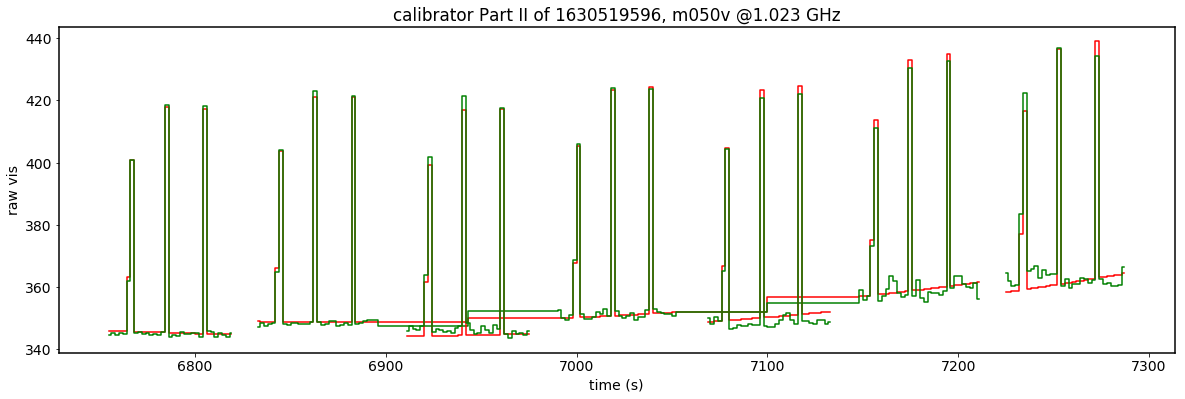

In [92]:
##show model and raw vis
plt.figure(figsize=(20,6))
m=ks.calc_total_model_v3(timestamps, nd_ratio, T_ptr, eta_pb, Tndb, Tel, Tgal, gtb, smb, nd_0, nd_1x)
m=np.ma.array(m,mask=visb_ptr[:,ch_plot].mask)
plt.step(timestamps[dp_c0b]-timestamps[0],m[dp_c0b],'r-',where='mid')
plt.step(timestamps[dp_c1b]-timestamps[0],m[dp_c1b],'r-',where='mid')
plt.step(timestamps[dp_c0b]-timestamps[0],visb_ptr[dp_c0b,ch_plot],'g-',where='mid')
plt.step(timestamps[dp_c1b]-timestamps[0],visb_ptr[dp_c1b,ch_plot],'g-',where='mid')
#if fname in ['1551055211','1551037708','1579725085', '1580260015','1630519596']:
plt.step(timestamps[dp_c2b]-timestamps[0],m[dp_c2b],'r-',where='mid')
plt.step(timestamps[dp_c3b]-timestamps[0],m[dp_c3b],'r-',where='mid')
plt.step(timestamps[dp_c4b]-timestamps[0],m[dp_c4b],'r-',where='mid')
plt.step(timestamps[dp_c2b]-timestamps[0],visb_ptr[dp_c2b,ch_plot],'g-',where='mid')
plt.step(timestamps[dp_c3b]-timestamps[0],visb_ptr[dp_c3b,ch_plot],'g-',where='mid')
plt.step(timestamps[dp_c4b]-timestamps[0],visb_ptr[dp_c4b,ch_plot],'g-',where='mid')
plt.xlabel('time (s)')
plt.ylabel('raw vis')
plt.title('calibrator Part II of '+str(fname)+', '+str(recv)+ ' @'+ str(round(freqs[ch_plot]/1e9,3)) +' GHz')
plt.show()

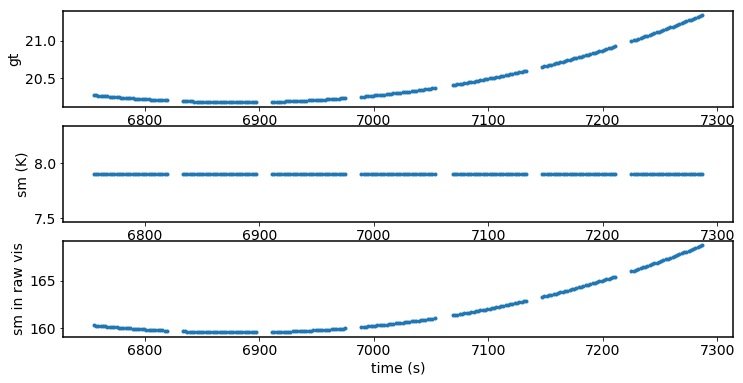

In [93]:
#show curves for fitting parametrs
plt.figure(figsize=(12,6))
plt.subplot(311)
plt.plot(timestamps[dp_cb]-timestamps[0],ks.func_gt(timestamps,gtb)[dp_cb],'.')
plt.ylabel('gt')
plt.subplot(312)
plt.plot(timestamps[dp_cb]-timestamps[0],ks.func_sm(timestamps,smb)[dp_cb],'.')
plt.ylabel('sm (K)')
plt.subplot(313)
plt.plot(timestamps[dp_cb]-timestamps[0],ks.func_gt(timestamps,gtb)[dp_cb]*ks.func_sm(timestamps,smb)[dp_cb],'.')
plt.xlabel('time (s)')
plt.ylabel('sm in raw vis')
plt.show()

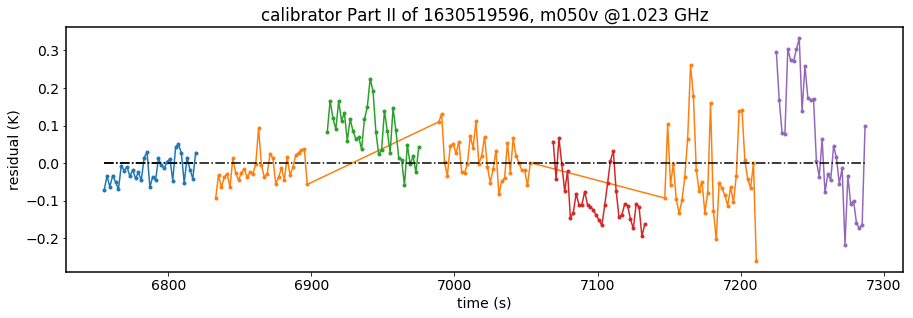

In [94]:
#show residuals
plt.figure(figsize=(15,4.5))
g=ks.func_gt(timestamps,gtb)
m=ks.calc_total_model_v3(timestamps, nd_ratio, T_ptr, eta_pb, Tndb, Tel, Tgal, gtb, smb, nd_0, nd_1x)
plt.plot([timestamps[dp_c0b][0]-timestamps[0],timestamps[dp_c0b][-1]-timestamps[0]],[0,0],'k-.')
plt.plot(timestamps[dp_c0b]-timestamps[0],(visb_ptr[dp_c0b,ch_plot]-m[dp_c0b])/g[dp_c0b],'.-')
plt.plot(timestamps[dp_c1b]-timestamps[0],(visb_ptr[dp_c1b,ch_plot]-m[dp_c1b])/g[dp_c1b],'.-')
#if fname in ['1551055211','1551037708','1579725085', '1580260015','1630519596']:
plt.plot(timestamps[dp_c2b]-timestamps[0],(visb_ptr[dp_c2b,ch_plot]-m[dp_c2b])/g[dp_c2b],'.-')
plt.plot(timestamps[dp_c3b]-timestamps[0],(visb_ptr[dp_c3b,ch_plot]-m[dp_c3b])/g[dp_c3b],'.-')
plt.plot(timestamps[dp_c4b]-timestamps[0],(visb_ptr[dp_c4b,ch_plot]-m[dp_c4b])/g[dp_c4b],'.-')
plt.plot([timestamps[dp_c0b][0]-timestamps[0],timestamps[dp_c4b][-1]-timestamps[0]],[0,0],'k-.')
plt.xlabel('time (s)')
plt.ylabel('residual (K)')
plt.title('calibrator Part II of '+str(fname)+', '+str(recv)+ ' @'+ str(round(freqs[ch_plot]/1e9,3)) +' GHz')
#plt.savefig('caliB_ch'+str(ch_plot)+'.pdf')
plt.show()

#resi_b=(visb_ptr[dp_c3b,ch_plot]-m[dp_c3b])/g[dp_c3b]
#print resi_b.mean(),resi_b.std()

In [95]:
#test begin

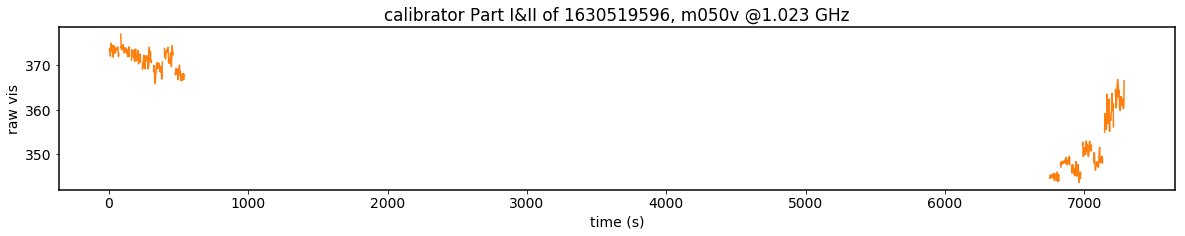

In [96]:
#select raw vis for track befor scan
visab_ptr = vis_clean.copy()
#visa_ptr_raw = np.ma.array(vis_backup.copy(),mask=flags)
for i in range(len(timestamps)):
    if i not in dp_ca and i not in dp_cb:
        visab_ptr.mask[i,:]=True
        #visa_ptr_raw.mask[i,:]=True
#show diode off data
plt.figure(figsize=(20,3))

plt.plot(timestamps[nd_0]-timestamps[0],visab_ptr[nd_0,ch_plot],c='C1')
#plt.plot(timestamps[nd_0]-timestamps[0],visa_ptr_raw[nd_0,ch_plot],c='grey',zorder=0)
plt.xlabel('time (s)')
plt.ylabel('raw vis')
#plt.legend(['raw data to be fitted','raw data'],ncol=2, fontsize=12)
plt.title('calibrator Part I&II of '+str(fname)+', '+str(recv)+ ' @'+ str(round(freqs[ch_plot]/1e9,3)) +' GHz')
plt.show()

In [97]:
####set input parameters
#Trec0=Trec_list[ch_plot]
print (Trec0)
eta_p0=1.0
func_sm_param0=[Trec0]
func_gt_param0=[(ga0+gb0)/2.,0,0,0,0]

print (Tnd_ref)

####fitting######
instru_pab=ks.solve_params0_v3(timestamps, visab_ptr, ch_plot, nd_ratio, T_ptr, eta_p0, Tnd_ref, Tnd_std, Tel, Tgal,
                      func_gt_param0, func_sm_param0, nd_0, nd_1x)

######get fitting result#####
Tndab=instru_pab[0]
eta_pab=instru_pab[1]
smab=instru_pab[2:-5]
gtab=instru_pab[-5:]

print (Tndab, eta_pab, smab, gtab)

7.238493652343751
23.07245815127522
Optimization terminated successfully.
         Current function value: 3067.150922
         Iterations: 52
         Function evaluations: 8303
24.91814668930684 1.0 [8.73526776] [24.45334042 -1.01418092 -7.40720552  0.6617971   3.57224102]


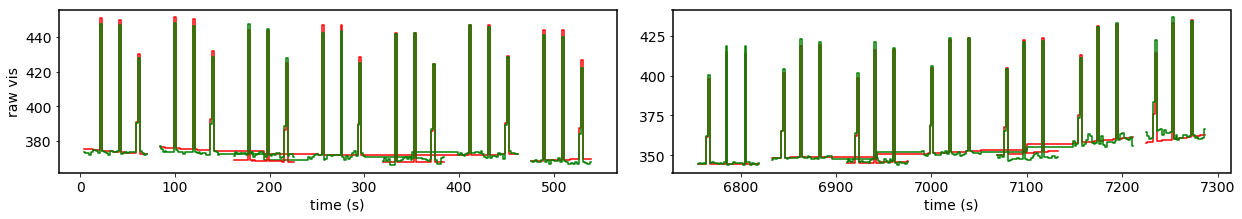

In [98]:
##show model and raw vis

m=ks.calc_total_model_v3(timestamps, nd_ratio, T_ptr, eta_pab, Tndab, Tel, Tgal, gtab, smab, nd_0, nd_1x)
m=np.ma.array(m,mask=visab_ptr[:,ch_plot].mask)

plt.figure(figsize=(21,3))
plt.subplots_adjust(wspace=0.1,hspace=0.25)
plt.subplot(121)
plt.step(timestamps[dp_c0a]-timestamps[0],m[dp_c0a],'r-',where='mid')
plt.step(timestamps[dp_c1a]-timestamps[0],m[dp_c1a],'r-',where='mid')
plt.step(timestamps[dp_c0a]-timestamps[0],visab_ptr[dp_c0a,ch_plot],'g-',where='mid')
plt.step(timestamps[dp_c1a]-timestamps[0],visab_ptr[dp_c1a,ch_plot],'g-',where='mid')
plt.step(timestamps[dp_c2a]-timestamps[0],m[dp_c2a],'r-',where='mid')
plt.step(timestamps[dp_c3a]-timestamps[0],m[dp_c3a],'r-',where='mid')
plt.step(timestamps[dp_c4a]-timestamps[0],m[dp_c4a],'r-',where='mid')
plt.step(timestamps[dp_c2a]-timestamps[0],visab_ptr[dp_c2a,ch_plot],'g-',where='mid')
plt.step(timestamps[dp_c3a]-timestamps[0],visab_ptr[dp_c3a,ch_plot],'g-',where='mid')
plt.step(timestamps[dp_c4a]-timestamps[0],visab_ptr[dp_c4a,ch_plot],'g-',where='mid')
plt.xlabel('time (s)')
plt.ylabel('raw vis')
plt.subplot(122)
plt.step(timestamps[dp_c0b]-timestamps[0],m[dp_c0b],'r-',where='mid')
plt.step(timestamps[dp_c1b]-timestamps[0],m[dp_c1b],'r-',where='mid')
plt.step(timestamps[dp_c0b]-timestamps[0],visab_ptr[dp_c0b,ch_plot],'g-',where='mid')
plt.step(timestamps[dp_c1b]-timestamps[0],visab_ptr[dp_c1b,ch_plot],'g-',where='mid')
plt.step(timestamps[dp_c2b]-timestamps[0],m[dp_c2b],'r-',where='mid')
plt.step(timestamps[dp_c3b]-timestamps[0],m[dp_c3b],'r-',where='mid')
plt.step(timestamps[dp_c4b]-timestamps[0],m[dp_c4b],'r-',where='mid')
plt.step(timestamps[dp_c2b]-timestamps[0],visab_ptr[dp_c2b,ch_plot],'g-',where='mid')
plt.step(timestamps[dp_c3b]-timestamps[0],visab_ptr[dp_c3b,ch_plot],'g-',where='mid')
plt.step(timestamps[dp_c4b]-timestamps[0],visab_ptr[dp_c4b,ch_plot],'g-',where='mid')
plt.xlabel('time (s)')
plt.show()

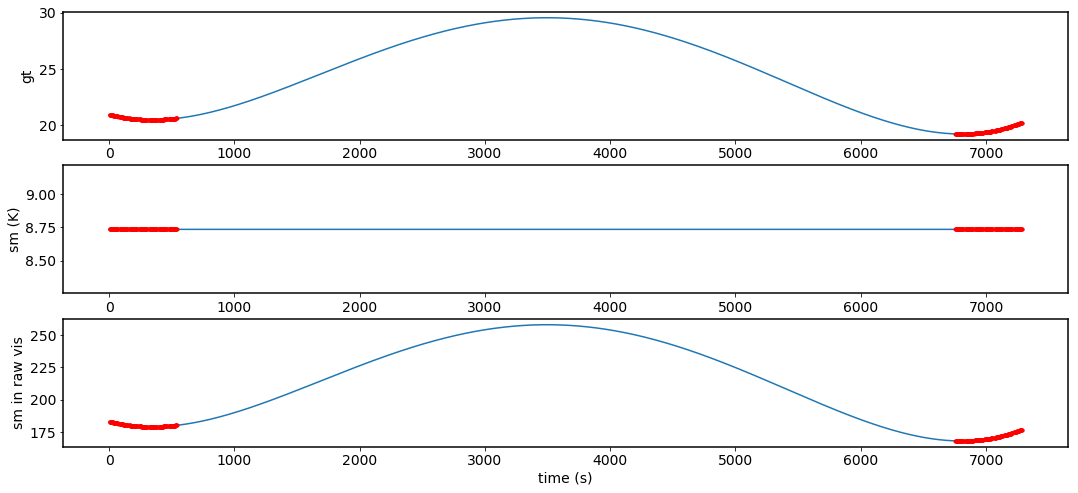

In [99]:
#show curves for fitting parametrs
plt.figure(figsize=(18,8))
plt.subplot(311)
plt.plot(timestamps-timestamps[0],ks.func_gt(timestamps,gtab))
plt.plot(timestamps[dp_ca]-timestamps[0],ks.func_gt(timestamps,gtab)[dp_ca],'r.')
plt.plot(timestamps[dp_cb]-timestamps[0],ks.func_gt(timestamps,gtab)[dp_cb],'r.')
plt.ylabel('gt')
plt.subplot(312)
plt.plot(timestamps-timestamps[0],ks.func_sm(timestamps,smab))
plt.plot(timestamps[dp_ca]-timestamps[0],ks.func_sm(timestamps,smab)[dp_ca],'r.')
plt.plot(timestamps[dp_cb]-timestamps[0],ks.func_sm(timestamps,smab)[dp_cb],'r.')
plt.ylabel('sm (K)')
plt.subplot(313)
plt.plot(timestamps-timestamps[0],ks.func_gt(timestamps,gtab)*ks.func_sm(timestamps,smab))
plt.plot(timestamps[dp_ca]-timestamps[0],ks.func_gt(timestamps,gtab)[dp_ca]*ks.func_sm(timestamps,smab)[dp_ca],'r.')
plt.plot(timestamps[dp_cb]-timestamps[0],ks.func_gt(timestamps,gtab)[dp_cb]*ks.func_sm(timestamps,smab)[dp_cb],'r.')
plt.xlabel('time (s)')
plt.ylabel('sm in raw vis')
plt.show()

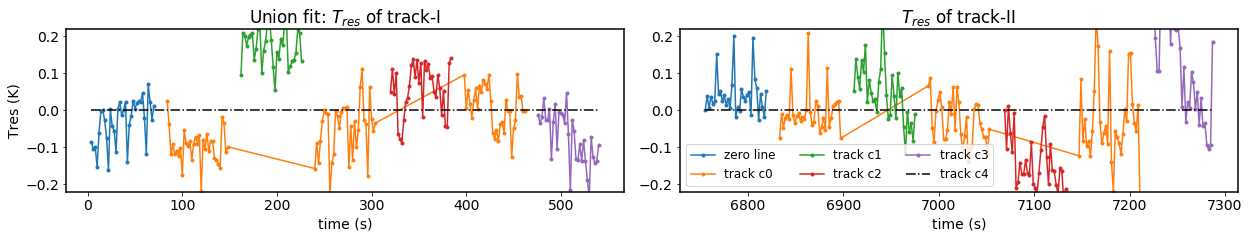

In [100]:
##show model and raw vis
plt.figure(figsize=(21,3))
plt.subplots_adjust(wspace=0.1,hspace=0.25)
m=ks.calc_total_model_v3(timestamps, nd_ratio, T_ptr, eta_pab, Tndab, Tel, Tgal, gtab, smab, nd_0, nd_1x)
mab=np.ma.array(m,mask=visab_ptr[:,ch_plot].mask)
gab=ks.func_gt(timestamps,gtab)
resiab=(visab_ptr[:,ch_plot]-mab)/gab

plt.subplot(121)
#plt.plot([timestamps[dp_c0a][0]-timestamps[0],timestamps[dp_c0a][-1]-timestamps[0]],[0,0],'k-.')
plt.plot(timestamps[dp_c0a]-timestamps[0],resiab[dp_c0a],'.-')
plt.plot(timestamps[dp_c1a]-timestamps[0],resiab[dp_c1a],'.-')
plt.plot(timestamps[dp_c2a]-timestamps[0],resiab[dp_c2a],'.-')
plt.plot(timestamps[dp_c3a]-timestamps[0],resiab[dp_c3a],'.-')
plt.plot(timestamps[dp_c4a]-timestamps[0],resiab[dp_c4a],'.-')
plt.plot([timestamps[dp_c0a][0]-timestamps[0],timestamps[dp_c4a][-1]-timestamps[0]],[0,0],'k-.')
plt.xlabel('time (s)')
plt.ylabel('Tres (K)')
plt.ylim(-0.22,0.22)
plt.title('Union fit: $T_{res}$ of track-I')

plt.subplot(122)
#plt.plot([timestamps[dp_c0b][0]-timestamps[0],timestamps[dp_c0b][-1]-timestamps[0]],[0,0],'k-.')
plt.plot(timestamps[dp_c0b]-timestamps[0],resiab[dp_c0b],'.-')
plt.plot(timestamps[dp_c1b]-timestamps[0],resiab[dp_c1b],'.-')
plt.plot(timestamps[dp_c2b]-timestamps[0],resiab[dp_c2b],'.-')
plt.plot(timestamps[dp_c3b]-timestamps[0],resiab[dp_c3b],'.-')
plt.plot(timestamps[dp_c4b]-timestamps[0],resiab[dp_c4b],'.-')
plt.plot([timestamps[dp_c0b][0]-timestamps[0],timestamps[dp_c4b][-1]-timestamps[0]],[0,0],'k-.')
plt.xlabel('time (s)')
plt.legend(['zero line','track c0', 'track c1', 'track c2', 'track c3','track c4'],fontsize=12, ncol=3)
plt.ylim(-0.22,0.22)
plt.title('$T_{res}$ of track-II')
#plt.savefig('F_caliAB_ch'+str(ch_plot)+'.pdf', bbox_inches='tight')
plt.show()


In [101]:
####test end

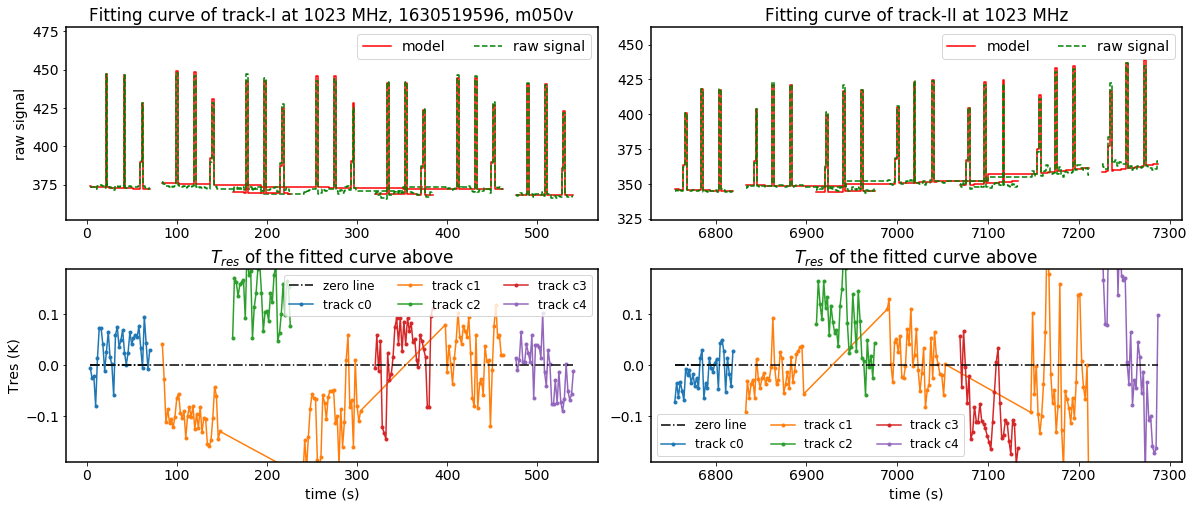

In [102]:
##show model and raw vis
plt.figure(figsize=(20,8))
plt.subplots_adjust(wspace=0.1,hspace=0.25)
plt.subplot(221)
m=ks.calc_total_model_v3(timestamps, nd_ratio, T_ptr, eta_pa, Tnda, Tel, Tgal, gta, sma, nd_0, nd_1x)
ma=np.ma.array(m,mask=visa_ptr[:,ch_plot].mask)
plt.plot(timestamps[dp_c0a]-timestamps[0],ma[dp_c0a],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c0a]-timestamps[0],visa_ptr[dp_c0a,ch_plot],'g--',drawstyle='steps-mid')
plt.plot(timestamps[dp_c1a]-timestamps[0],ma[dp_c1a],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c1a]-timestamps[0],visa_ptr[dp_c1a,ch_plot],'g--',drawstyle='steps-mid')
#if fname in ['1551055211','1551037708','1630519596']:
plt.plot(timestamps[dp_c2a]-timestamps[0],ma[dp_c2a],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c3a]-timestamps[0],ma[dp_c3a],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c4a]-timestamps[0],ma[dp_c4a],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c2a]-timestamps[0],visa_ptr[dp_c2a,ch_plot],'g--',drawstyle='steps-mid')
plt.plot(timestamps[dp_c3a]-timestamps[0],visa_ptr[dp_c3a,ch_plot],'g--',drawstyle='steps-mid')
plt.plot(timestamps[dp_c4a]-timestamps[0],visa_ptr[dp_c4a,ch_plot],'g--',drawstyle='steps-mid')
#plt.xlabel('time (s)')
plt.ylabel('raw signal')
plt.legend(['model','raw signal'],ncol=2)
plt.ylim(np.nanmin(visa_ptr[dp_c0a,ch_plot])-20,np.nanmax(visa_ptr[dp_c1a,ch_plot])+30)
plt.title('Fitting curve of track-I at '+ str(int(freqs[ch_plot]/1e6)) +' MHz, '+str(fname)+', '+str(recv))
if fname=='1551055211':
    plt.title('Fitting curve of track-I at '+ str(int(freqs[ch_plot]/1e6)) +' MHz, '+str(recv)+' of obs190225')
plt.subplot(223)
ga=ks.func_gt(timestamps,gta)
resia=(visa_ptr[:,ch_plot]-ma)/ga
plt.plot([timestamps[dp_c0a][0]-timestamps[0],timestamps[dp_c0a][-1]-timestamps[0]],[0,0],'k-.')
plt.plot(timestamps[dp_c0a]-timestamps[0],resia[dp_c0a],'.-')
plt.plot(timestamps[dp_c1a]-timestamps[0],resia[dp_c1a],'.-')
#if fname in ['1551055211','1551037708','1630519596']:
plt.plot(timestamps[dp_c2a]-timestamps[0],resia[dp_c2a],'.-')
plt.plot(timestamps[dp_c3a]-timestamps[0],resia[dp_c3a],'.-')
plt.plot(timestamps[dp_c4a]-timestamps[0],resia[dp_c4a],'.-')
plt.plot([timestamps[dp_c0a][0]-timestamps[0],timestamps[dp_c4a][-1]-timestamps[0]],[0,0],'k-.')
plt.xlabel('time (s)')
plt.ylabel('Tres (K)')
plt.ylim(-0.15,0.15)
#plt.legend(['line of T=0 K','track calibrator outskirt', 'track calibrator center'],ncol=3)
#if fname in ['1551055211','1551037708','1579725085', '1580260015','1630519596']:
plt.legend(['zero line','track c0', 'track c1', 'track c2', 'track c3','track c4'], fontsize=12, ncol=3)
plt.ylim(-0.19,0.19)
plt.title('$T_{res}$ of the fitted curve above')
#plt.savefig('caliA_ch'+str(ch_plot)+'.png')
##show model and raw vis
plt.subplot(222)
m=ks.calc_total_model_v3(timestamps, nd_ratio, T_ptr, eta_pb, Tndb, Tel, Tgal, gtb, smb, nd_0, nd_1x)
mb=np.ma.array(m,mask=visb_ptr[:,ch_plot].mask)
plt.plot(timestamps[dp_c0b]-timestamps[0],mb[dp_c0b],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c0b]-timestamps[0],visb_ptr[dp_c0b,ch_plot],'g--',drawstyle='steps-mid')
plt.plot(timestamps[dp_c1b]-timestamps[0],mb[dp_c1b],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c1b]-timestamps[0],visb_ptr[dp_c1b,ch_plot],'g--',drawstyle='steps-mid')
#if fname in ['1551055211','1551037708','1579725085', '1580260015','1630519596']:
plt.plot(timestamps[dp_c2b]-timestamps[0],mb[dp_c2b],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c3b]-timestamps[0],mb[dp_c3b],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c4b]-timestamps[0],mb[dp_c4b],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c2b]-timestamps[0],visb_ptr[dp_c2b,ch_plot],'g--',drawstyle='steps-mid')
plt.plot(timestamps[dp_c3b]-timestamps[0],visb_ptr[dp_c3b,ch_plot],'g--',drawstyle='steps-mid')
plt.plot(timestamps[dp_c4b]-timestamps[0],visb_ptr[dp_c4b,ch_plot],'g--',drawstyle='steps-mid')
plt.ylim(np.nanmin(visb_ptr[dp_c0b,ch_plot])-20,np.nanmax(visb_ptr[dp_c1b,ch_plot])+30)
#plt.xlabel('time (s)')
#plt.ylabel('raw signal')
plt.legend(['model','raw signal'],ncol=2)
plt.title('Fitting curve of track-II at '+ str(int(freqs[ch_plot]/1e6)) +' MHz')
plt.subplot(224)
gb=ks.func_gt(timestamps,gtb)
resib=(visb_ptr[:,ch_plot]-mb)/gb
plt.plot([timestamps[dp_c0b][0]-timestamps[0],timestamps[dp_c0b][-1]-timestamps[0]],[0,0],'k-.')
plt.plot(timestamps[dp_c0b]-timestamps[0],resib[dp_c0b],'.-')
plt.plot(timestamps[dp_c1b]-timestamps[0],resib[dp_c1b],'.-')
#if fname in ['1551055211','1551037708','1579725085', '1580260015','1630519596']:
plt.plot(timestamps[dp_c2b]-timestamps[0],resib[dp_c2b],'.-')
plt.plot(timestamps[dp_c3b]-timestamps[0],resib[dp_c3b],'.-')
plt.plot(timestamps[dp_c4b]-timestamps[0],resib[dp_c4b],'.-')
plt.plot([timestamps[dp_c0b][0]-timestamps[0],timestamps[dp_c4b][-1]-timestamps[0]],[0,0],'k-.')
plt.xlabel('time (s)')
#plt.ylabel('residual (K)')
#if fname in ['1551055211','1551037708','1579725085', '1580260015','1630519596']:
plt.legend(['zero line','track c0', 'track c1', 'track c2', 'track c3','track c4'],fontsize=12, ncol=3)
#plt.title('calibrator Part II of '+str(fname)+', '+str(recv)+ ' @'+ str(round(freqs[ch_plot]/1e9,3)) +' GHz')
plt.ylim(-0.19,0.19)
plt.title('$T_{res}$ of the fitted curve above')
#plt.savefig('F_caliB_ch'+str(ch_plot)+'.pdf', bbox_inches='tight')
plt.show()


In [103]:
print (Tnd_ref)
print (Tnda,Tndb,(Tnda+Tndb)/2.)


23.07245815127522
25.06204001280865 24.47437882406701 24.76820941843783


In [104]:
print  (plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'])
plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'] = 18, 1.5, 1.5
#plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'] = 10.0, 0.8, 1.5
print  (plt.rcParams['font.size'], plt.rcParams[u'axes.linewidth'],plt.rcParams['lines.linewidth'])

14.0 1.5 1.5
18.0 1.5 1.5


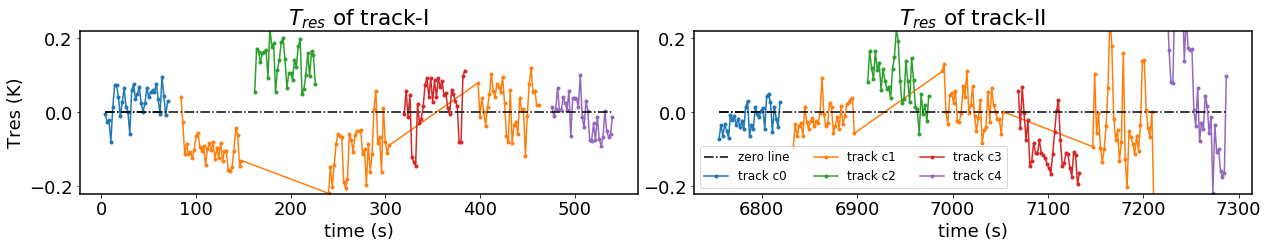

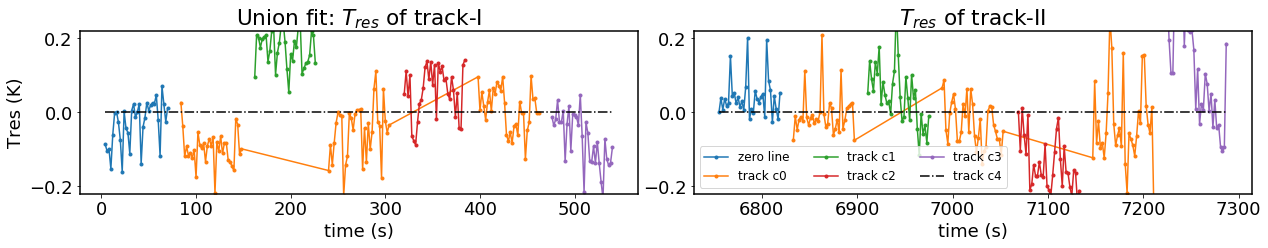

In [105]:
##show model and raw vis
plt.figure(figsize=(21,3))
plt.subplots_adjust(wspace=0.1,hspace=0.25)
m=ks.calc_total_model_v3(timestamps, nd_ratio, T_ptr, eta_pa, Tnda, Tel, Tgal, gta, sma, nd_0, nd_1x)
ma=np.ma.array(m,mask=visa_ptr[:,ch_plot].mask)

plt.subplot(121)
ga=ks.func_gt(timestamps,gta)
resia=(visa_ptr[:,ch_plot]-ma)/ga
plt.plot([timestamps[dp_c0a][0]-timestamps[0],timestamps[dp_c0a][-1]-timestamps[0]],[0,0],'k-.')
plt.plot(timestamps[dp_c0a]-timestamps[0],resia[dp_c0a],'.-')
plt.plot(timestamps[dp_c1a]-timestamps[0],resia[dp_c1a],'.-')
#if fname in ['1551055211','1551037708','1630519596']:
plt.plot(timestamps[dp_c2a]-timestamps[0],resia[dp_c2a],'.-')
plt.plot(timestamps[dp_c3a]-timestamps[0],resia[dp_c3a],'.-')
plt.plot(timestamps[dp_c4a]-timestamps[0],resia[dp_c4a],'.-')
plt.plot([timestamps[dp_c0a][0]-timestamps[0],timestamps[dp_c4a][-1]-timestamps[0]],[0,0],'k-.')
plt.xlabel('time (s)')
plt.ylabel('Tres (K)')
#plt.ylim(-0.15,0.15)
#plt.legend(['line of T=0 K','track calibrator outskirt', 'track calibrator center'],ncol=3)
#if fname in ['1551055211','1551037708','1579725085', '1580260015']:
#    plt.legend(['zero line','track c0', 'track c1', 'track c2', 'track c3','track c4'], fontsize=15, ncol=3)
plt.ylim(-0.22,0.22)
plt.title('$T_{res}$ of track-I')
if fname=='1551055211':
    plt.title('$T_{res}$ of track-I at '+ str(int(freqs[ch_plot]/1e6)) +' MHz, '+str(recv)+' of obs190225')
#plt.savefig('caliA_ch'+str(ch_plot)+'.png')
##show model and raw vis

m=ks.calc_total_model_v3(timestamps, nd_ratio, T_ptr, eta_pb, Tndb, Tel, Tgal, gtb, smb, nd_0, nd_1x)
mb=np.ma.array(m,mask=visb_ptr[:,ch_plot].mask)

plt.subplot(122)
gb=ks.func_gt(timestamps,gtb)
resib=(visb_ptr[:,ch_plot]-mb)/gb
plt.plot([timestamps[dp_c0b][0]-timestamps[0],timestamps[dp_c0b][-1]-timestamps[0]],[0,0],'k-.')
plt.plot(timestamps[dp_c0b]-timestamps[0],resib[dp_c0b],'.-')
plt.plot(timestamps[dp_c1b]-timestamps[0],resib[dp_c1b],'.-')
#if fname in ['1551055211','1551037708','1579725085', '1580260015','1630519596']:
plt.plot(timestamps[dp_c2b]-timestamps[0],resib[dp_c2b],'.-')
plt.plot(timestamps[dp_c3b]-timestamps[0],resib[dp_c3b],'.-')
plt.plot(timestamps[dp_c4b]-timestamps[0],resib[dp_c4b],'.-')
plt.plot([timestamps[dp_c0b][0]-timestamps[0],timestamps[dp_c4b][-1]-timestamps[0]],[0,0],'k-.')
plt.xlabel('time (s)')
#plt.ylabel('residual (K)')
#if fname in ['1551055211','1551037708','1579725085', '1580260015','1630519596']:
plt.legend(['zero line','track c0', 'track c1', 'track c2', 'track c3','track c4'],fontsize=12, ncol=3)
#plt.title('calibrator Part II of '+str(fname)+', '+str(recv)+ ' @'+ str(round(freqs[ch_plot]/1e9,3)) +' GHz')
plt.ylim(-0.22,0.22)
plt.title('$T_{res}$ of track-II')
plt.savefig('F_caliB_ch'+str(ch_plot)+'.pdf', bbox_inches='tight')
plt.show()

########################################
########################################
##show model and raw vis
plt.figure(figsize=(21,3))
plt.subplots_adjust(wspace=0.1,hspace=0.25)
m=ks.calc_total_model_v3(timestamps, nd_ratio, T_ptr, eta_pab, Tndab, Tel, Tgal, gtab, smab, nd_0, nd_1x)
mab=np.ma.array(m,mask=visab_ptr[:,ch_plot].mask)
gab=ks.func_gt(timestamps,gtab)
resiab=(visab_ptr[:,ch_plot]-mab)/gab

plt.subplot(121)
#plt.plot([timestamps[dp_c0a][0]-timestamps[0],timestamps[dp_c0a][-1]-timestamps[0]],[0,0],'k-.')
plt.plot(timestamps[dp_c0a]-timestamps[0],resiab[dp_c0a],'.-')
plt.plot(timestamps[dp_c1a]-timestamps[0],resiab[dp_c1a],'.-')
plt.plot(timestamps[dp_c2a]-timestamps[0],resiab[dp_c2a],'.-')
plt.plot(timestamps[dp_c3a]-timestamps[0],resiab[dp_c3a],'.-')
plt.plot(timestamps[dp_c4a]-timestamps[0],resiab[dp_c4a],'.-')
plt.plot([timestamps[dp_c0a][0]-timestamps[0],timestamps[dp_c4a][-1]-timestamps[0]],[0,0],'k-.')
plt.xlabel('time (s)')
plt.ylabel('Tres (K)')
plt.ylim(-0.22,0.22)
plt.title('Union fit: $T_{res}$ of track-I')

plt.subplot(122)
#plt.plot([timestamps[dp_c0b][0]-timestamps[0],timestamps[dp_c0b][-1]-timestamps[0]],[0,0],'k-.')
plt.plot(timestamps[dp_c0b]-timestamps[0],resiab[dp_c0b],'.-')
plt.plot(timestamps[dp_c1b]-timestamps[0],resiab[dp_c1b],'.-')
plt.plot(timestamps[dp_c2b]-timestamps[0],resiab[dp_c2b],'.-')
plt.plot(timestamps[dp_c3b]-timestamps[0],resiab[dp_c3b],'.-')
plt.plot(timestamps[dp_c4b]-timestamps[0],resiab[dp_c4b],'.-')
plt.plot([timestamps[dp_c0b][0]-timestamps[0],timestamps[dp_c4b][-1]-timestamps[0]],[0,0],'k-.')
plt.xlabel('time (s)')
plt.legend(['zero line','track c0', 'track c1', 'track c2', 'track c3','track c4'],fontsize=12, ncol=3)
plt.ylim(-0.22,0.22)
plt.title('$T_{res}$ of track-II')
#plt.savefig('F_caliAB_ch'+str(ch_plot)+'.pdf', bbox_inches='tight')
plt.show()


In [106]:
print (Tnda,Tndb)
print ((Tnda+Tndb)/2.)
print (Tndab)

25.06204001280865 24.47437882406701
24.76820941843783
24.91814668930684


## extra flagger for weak calibrator

In [107]:
#copy start

In [108]:
Tnda_raw,Tndb_raw=Tnda,Tndb

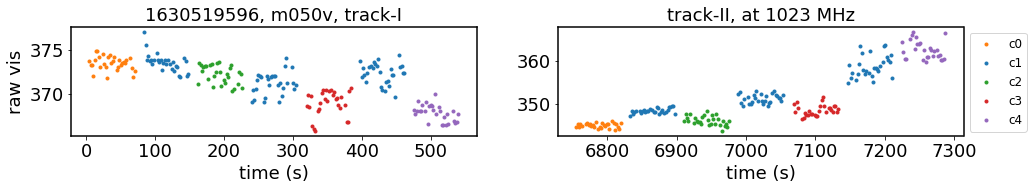

In [109]:
v_min1,v_max1=np.ma.min(visa_ptr[nd_0,ch_plot]),np.ma.max(visa_ptr[nd_0,ch_plot])
dp_list1=[dp_c1a,dp_c0a,dp_c2a,dp_c3a,dp_c4a]
vis_plot1=visa_ptr[:,ch_plot].copy()
vis_plot1.mask[nd_1x]=True

v_min2,v_max2=np.ma.min(visb_ptr[nd_0,ch_plot]),np.ma.max(visb_ptr[nd_0,ch_plot])
dp_list2=[dp_c1b,dp_c0b,dp_c2b,dp_c3b,dp_c4b]
vis_plot2=visb_ptr[:,ch_plot].copy()
vis_plot2.mask[nd_1x]=True

plt.figure(figsize=(16,2))
plt.subplot(121)
plt.plot(timestamps[dp_c0a]-timestamps[0],vis_plot1[dp_c0a],'C1.')
plt.plot(timestamps[dp_c1a]-timestamps[0],vis_plot1[dp_c1a],'C0.')
plt.plot(timestamps[dp_c2a]-timestamps[0],vis_plot1[dp_c2a],'C2.')
plt.plot(timestamps[dp_c3a]-timestamps[0],vis_plot1[dp_c3a],'C3.')
plt.plot(timestamps[dp_c4a]-timestamps[0],vis_plot1[dp_c4a],'C4.')
#plt.legend(['c0','c1','c2','c3','c4'],ncol=5, fontsize=10)
plt.title(str(fname)+', '+recv+', track-I',fontsize=18)
plt.xlabel('time (s)')
plt.ylabel('raw vis')
plt.subplot(122)
plt.plot(timestamps[dp_c0b]-timestamps[0],vis_plot2[dp_c0b],'C1.')
plt.plot(timestamps[dp_c1b]-timestamps[0],vis_plot2[dp_c1b],'C0.')
plt.plot(timestamps[dp_c2b]-timestamps[0],vis_plot2[dp_c2b],'C2.')
plt.plot(timestamps[dp_c3b]-timestamps[0],vis_plot2[dp_c3b],'C3.')
plt.plot(timestamps[dp_c4b]-timestamps[0],vis_plot2[dp_c4b],'C4.')
plt.title('track-II, at '+ str(round(freqs[ch_plot]/1e6)) +' MHz',fontsize=18)
plt.legend(['c0','c1','c2','c3','c4'],ncol=1, fontsize=12,bbox_to_anchor=(1.0, 1.0))
plt.xlabel('time (s)')
plt.savefig(fname+'rfi_test1.png', bbox_inches='tight')
plt.show()

In [110]:
#test begin

In [111]:
dp_flist1=[dp_c0a,dp_c1a1,dp_c2a,dp_c1a2,dp_c3a,dp_c1a3,dp_c4a]
mdn1_list,std1_list=kr.cal_std_list(dp_flist1,vis_plot1)
print (np.ma.mean(std1_list),std1_list)

1.0610575053075701 [0.7610287980003413, 1.018874447636724, 1.0102898939604865, 1.2260254618964093, 1.3798404536941982, 1.1366483236096314, 0.8946951583552009]


In [112]:
dp_flist2=[dp_c0b,dp_c1b1,dp_c2b,dp_c1b2,dp_c3b,dp_c1b3,dp_c4b]
mdn2_list,std2_list=kr.cal_std_list(dp_flist2,vis_plot2)
print (np.ma.mean(std2_list),std2_list)

1.2801821798242112 [0.52675555617371, 0.5794856963639161, 1.0681876040358433, 1.009830673550042, 1.2191795797605094, 2.4948841925681235, 2.062951956317335]


In [113]:
m_lim1=kr.set_vis_lim(dp_flist1,vis_plot1)
m_lim2=kr.set_vis_lim(dp_flist2,vis_plot2)

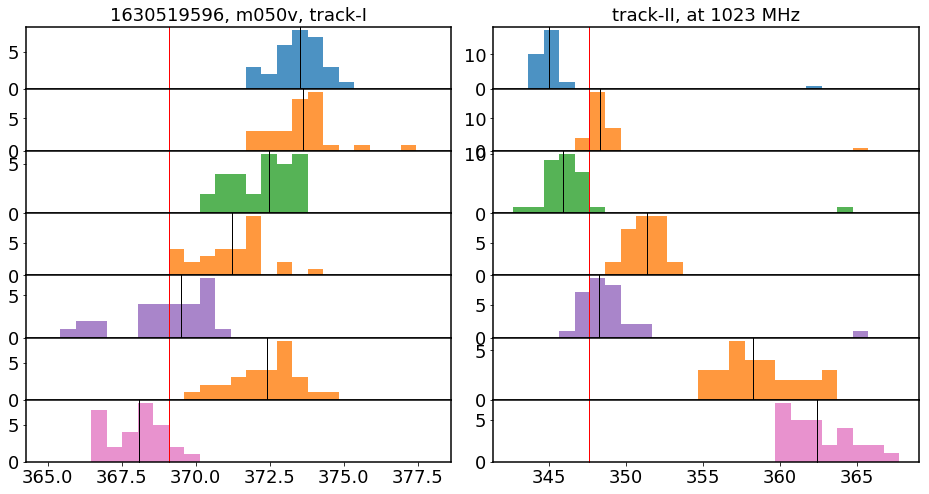

In [114]:
plt.figure(figsize=(16,8))
plt.subplots_adjust(wspace=0.1,hspace=0.)
for i in range(len(dp_flist1)):
    
    if i in [1,3,5]:
        color_local='C1'
    if i in [0,2,4,6]:
        color_local='C'+str(i)
        
    dp1=dp_flist1[i]
    mdn1=mdn1_list[i]
    plt.subplot(len(dp_flist1),2,2*i+1)
    plt.hist(vis_plot1[dp1],range=(v_min1-1,v_max1+1), bins=25,color=color_local,alpha=0.8)
    plt.plot(mdn1,0,'k|',ms=200)
    plt.plot(m_lim1,0,'r|',ms=200)
    if i < len(dp_flist1)-1:
        plt.xticks([])
    if i ==0:
        plt.title(str(fname)+', '+recv+', track-I',fontsize=18)
        
    dp2=dp_flist2[i]
    mdn2=mdn2_list[i]
    plt.subplot(len(dp_flist2),2,2*i+2)
    plt.hist(vis_plot2[dp2],range=(v_min2-1,v_max2+1), bins=25,color=color_local,alpha=0.8)
    plt.plot(mdn2,0,'k|',ms=200)
    plt.plot(m_lim2,0,'r|',ms=200)
    if i < len(dp_flist2)-1:
        plt.xticks([])
    if i==0:
        plt.title('track-II, at '+ str(round(freqs[ch_plot]/1e6)) +' MHz',fontsize=18)
    
plt.savefig(fname+'rfi_test2.png', bbox_inches='tight')
plt.show()

In [115]:
visa_ptr2=kr.filter_median(dp_flist1,mdn1_list,m_lim1,visa_ptr,ch_plot)
visb_ptr2=kr.filter_median(dp_flist2,mdn2_list,m_lim2,visb_ptr,ch_plot)

# group 0 is masked due to high-median
# group 2 is masked due to high-median
# group 4 is masked due to high-median
# group num is 7 in total, 3 masked
---------------------------------------
# group 4 is masked due to high-median
# group 6 is masked due to high-median
# group num is 7 in total, 2 masked
---------------------------------------


In [116]:
#print(np.ma.mean(std1_list),np.ma.mean(std2_list))
#std_lim=np.min([np.ma.mean(std1_list),np.ma.mean(std2_list)])
#print (std_lim)


In [117]:
std_list=list(std1_list)+list(std2_list)
std_lim=np.min(std_list)
print (std_lim)

0.52675555617371


In [118]:
ch_plot

800

In [119]:
sigma_cut=2.5
visa_ptr2=kr.filter_std(dp_flist1,std1_list,visa_ptr2,std_lim,sigma_cut,ch_plot)
visb_ptr2=kr.filter_std(dp_flist2,std2_list,visb_ptr2,std_lim,sigma_cut,ch_plot)

# group 4 masked due to std
# group num is 7 in total, 1 masked
---------------------------------------
# group 5 masked due to std
# group 6 masked due to std
# group num is 7 in total, 2 masked
---------------------------------------


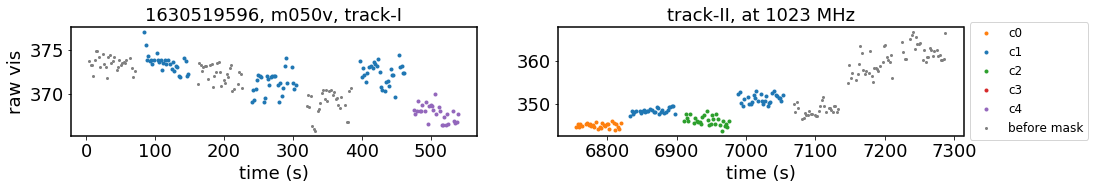

In [120]:
#v_min1,v_max1=np.ma.min(visa_ptr2[nd_0,ch_plot]),np.ma.max(visa_ptr2[nd_0,ch_plot])
dp_list1=[dp_c1a,dp_c0a,dp_c2a,dp_c3a,dp_c4a]
vis_plot1=visa_ptr2[:,ch_plot].copy()
vis_plot1.mask[nd_1x]=True

#v_min2,v_max2=np.ma.min(visb_ptr2[nd_0,ch_plot]),np.ma.max(visb_ptr2[nd_0,ch_plot])
dp_list2=[dp_c1b,dp_c0b,dp_c2b,dp_c3b,dp_c4b]
vis_plot2=visb_ptr2[:,ch_plot].copy()
vis_plot2.mask[nd_1x]=True

plt.figure(figsize=(16,2))
plt.subplot(121)

plt.plot(timestamps[dp_c0a]-timestamps[0],vis_plot1[dp_c0a],'C1.')
plt.plot(timestamps[dp_c1a]-timestamps[0],vis_plot1[dp_c1a],'C0.')
plt.plot(timestamps[dp_c2a]-timestamps[0],vis_plot1[dp_c2a],'C2.')
plt.plot(timestamps[dp_c3a]-timestamps[0],vis_plot1[dp_c3a],'C3.')
plt.plot(timestamps[dp_c4a]-timestamps[0],vis_plot1[dp_c4a],'C4.')
plt.plot(timestamps[nd_0]-timestamps[0],visa_ptr[nd_0,ch_plot],'.', ms=4, color='grey',zorder=0)
#plt.legend(['c0','c1','c2','c3','c4'],ncol=5, fontsize=10)
plt.title(str(fname)+', '+recv+', track-I',fontsize=18)
plt.xlabel('time (s)')
plt.ylabel('raw vis')
plt.subplot(122)

plt.plot(timestamps[dp_c0b]-timestamps[0],vis_plot2[dp_c0b],'C1.')
plt.plot(timestamps[dp_c1b]-timestamps[0],vis_plot2[dp_c1b],'C0.')
plt.plot(timestamps[dp_c2b]-timestamps[0],vis_plot2[dp_c2b],'C2.')
plt.plot(timestamps[dp_c3b]-timestamps[0],vis_plot2[dp_c3b],'C3.')
plt.plot(timestamps[dp_c4b]-timestamps[0],vis_plot2[dp_c4b],'C4.')
plt.plot(timestamps[nd_0]-timestamps[0],visb_ptr[nd_0,ch_plot],'.', ms=4, color='grey',zorder=0)
plt.title('track-II, at '+ str(round(freqs[ch_plot]/1e6)) +' MHz',fontsize=18)
plt.legend(['c0','c1','c2','c3','c4','before mask'],ncol=1, fontsize=12,bbox_to_anchor=(1, 1.1))
plt.xlabel('time (s)')
plt.savefig(fname+'rfi_test11.png', bbox_inches='tight')
plt.show()

In [121]:
track1_on_count,track1_off_count,track2_on_count,track2_off_count=3,4,3,4
for i in [dp_c1a1,dp_c1a2,dp_c1a3]:
    if (vis_plot1[i].mask==True).all():
        track1_on_count-=1
for i in [dp_c0a,dp_c2a,dp_c3a,dp_c4a]:
    if (vis_plot1[i].mask==True).all():
        track1_off_count-=1
for i in [dp_c1b1,dp_c1b2,dp_c1b3]:
    if (vis_plot2[i].mask==True).all():
        track2_on_count-=1
for i in [dp_c0b,dp_c2b,dp_c3b,dp_c4b]:
    if (vis_plot2[i].mask==True).all():
        track2_off_count-=1

In [122]:
print(track1_on_count,track1_off_count,track2_on_count,track2_off_count)

3 1 2 2


In [123]:
if track1_on_count>1 and track1_off_count>1:
    Trec0=Trec_list[ch_plot]
    print (Trec0)
    eta_p0=1.0
    func_sm_param0=[Trec0]
    func_gt_param0=[ga0,0,0,0,0]
    print (Tnd_ref)
    ####fitting
    instru_pa=ks.solve_params0_v3(timestamps, visa_ptr2, ch_plot, nd_ratio, T_ptr, eta_p0, Tnd_ref, Tnd_std, Tel, Tgal, func_gt_param0, func_sm_param0, nd_0, nd_1x)

    
    ####get fitting result
    Tnda=instru_pa[0]
    eta_pa=instru_pa[1]
    sma=instru_pa[2]
    gta=instru_pa[3:]

    print (Tnda, eta_pa, sma, gta)
else:
    Tnda, eta_pa, sma, gta=0,0,0,0
    print ('# not suitable for fitting')

# not suitable for fitting


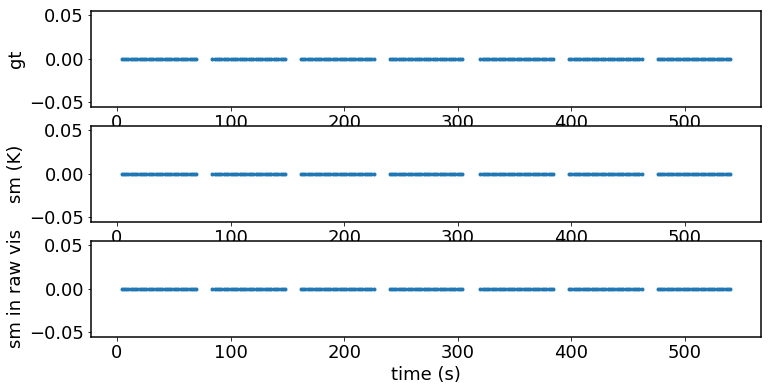

In [124]:
#show curves for fitting parameters
plt.figure(figsize=(12,6))
plt.subplot(311)
plt.plot(timestamps[dp_ca]-timestamps[0],ks.func_gt(timestamps,gta)[dp_ca],'.')
plt.ylabel('gt')
plt.subplot(312)
plt.plot(timestamps[dp_ca]-timestamps[0],ks.func_sm(timestamps,sma)[dp_ca],'.')
plt.ylabel('sm (K)')
plt.subplot(313)
plt.plot(timestamps[dp_ca]-timestamps[0],ks.func_gt(timestamps,gta)[dp_ca]*ks.func_sm(timestamps,sma)[dp_ca],'.')
plt.xlabel('time (s)')
plt.ylabel('sm in raw vis')
plt.show()

In [125]:
if track2_on_count>1 and track2_off_count>1:

    print (Trec0)
    eta_p0=1.0
    func_sm_param0=[Trec0]
    func_gt_param0=[gb0,0,0,0,0]

    print (Tnd_ref)

    ####fitting######
    instru_pb=ks.solve_params0_v3(timestamps, visb_ptr2, ch_plot, nd_ratio, T_ptr, eta_p0, Tnd_ref, Tnd_std, Tel, Tgal,
                          func_gt_param0, func_sm_param0, nd_0, nd_1x)

    ######get fitting result#####
    Tndb=instru_pb[0]
    eta_pb=instru_pb[1]
    smb=instru_pb[2]
    gtb=instru_pb[3:]

    print (Tndb, eta_pb, smb, gtb)
else:
    Tndb, eta_pb, smb, gtb=0,0,0,0
    print ('# not suitable for fitting')

7.238493652343751
23.07245815127522
Optimization terminated successfully.
         Current function value: 437.248650
         Iterations: 41
         Function evaluations: 6478
25.256274502464628 1.0 8.285134270225653 [20.01540499  1.74907623 -1.72036575 -2.33494427  2.64740388]


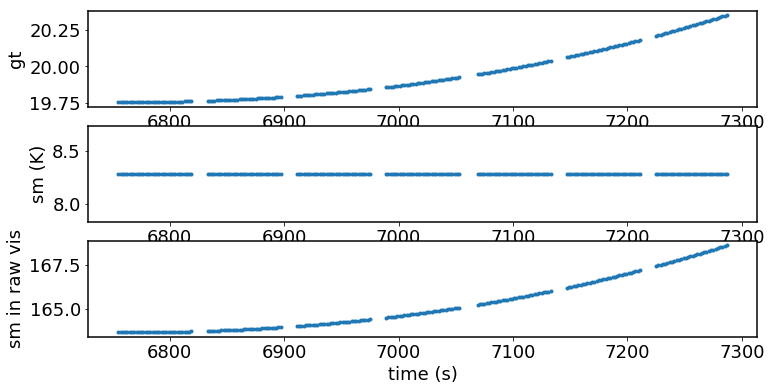

In [126]:
#show curves for fitting parametrs
plt.figure(figsize=(12,6))
plt.subplot(311)
plt.plot(timestamps[dp_cb]-timestamps[0],ks.func_gt(timestamps,gtb)[dp_cb],'.')
plt.ylabel('gt')
plt.subplot(312)
plt.plot(timestamps[dp_cb]-timestamps[0],ks.func_sm(timestamps,smb)[dp_cb],'.')
plt.ylabel('sm (K)')
plt.subplot(313)
plt.plot(timestamps[dp_cb]-timestamps[0],ks.func_gt(timestamps,gtb)[dp_cb]*ks.func_sm(timestamps,smb)[dp_cb],'.')
plt.xlabel('time (s)')
plt.ylabel('sm in raw vis')
plt.show()

0 25.256274502464628


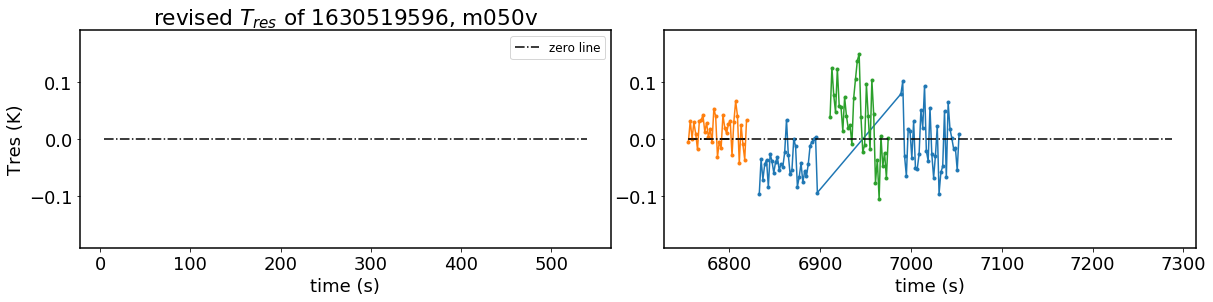

In [127]:
print (Tnda,Tndb)
##show model and raw vis
plt.figure(figsize=(20,4))
plt.subplots_adjust(wspace=0.1,hspace=0.25)
plt.subplot(121)
if track1_on_count>1 and track1_off_count>1:
    m=ks.calc_total_model_v3(timestamps, nd_ratio, T_ptr, eta_pa, Tnda, Tel, Tgal, gta, sma, nd_0, nd_1x)
    ma=np.ma.array(m,mask=visa_ptr2[:,ch_plot].mask)
    ga=ks.func_gt(timestamps,gta)
    resia=(visa_ptr2[:,ch_plot]-ma)/ga
    plt.plot([timestamps[dp_c0a][0]-timestamps[0],timestamps[dp_c0a][-1]-timestamps[0]],[0,0],'k-.')

    plt.plot(timestamps[dp_c1a]-timestamps[0],resia[dp_c1a],'.-')
    plt.plot(timestamps[dp_c0a]-timestamps[0],resia[dp_c0a],'.-')
    #if fname in ['1551055211','1551037708','1630519596']:
    plt.plot(timestamps[dp_c2a]-timestamps[0],resia[dp_c2a],'.-')
    plt.plot(timestamps[dp_c3a]-timestamps[0],resia[dp_c3a],'.-')
    plt.plot(timestamps[dp_c4a]-timestamps[0],resia[dp_c4a],'.-')
plt.plot([timestamps[dp_c0a][0]-timestamps[0],timestamps[dp_c4a][-1]-timestamps[0]],[0,0],'k-.')
plt.xlabel('time (s)')
plt.ylabel('Tres (K)')
plt.ylim(-0.15,0.15)
#plt.legend(['line of T=0 K','track calibrator outskirt', 'track calibrator center'],ncol=3)
#if fname in ['1551055211','1551037708','1579725085', '1580260015','1630519596']:
plt.legend(['zero line','track c0', 'track c1', 'track c2', 'track c3','track c4'], fontsize=12, ncol=3)
plt.ylim(-0.19,0.19)
plt.title('revised $T_{res}$ of'+' '+fname+', '+recv)
#plt.savefig('caliA_ch'+str(ch_plot)+'.png')
##show model and raw vis
plt.subplot(122)
if track2_on_count>1 and track2_off_count>1:

    m=ks.calc_total_model_v3(timestamps, nd_ratio, T_ptr, eta_pb, Tndb, Tel, Tgal, gtb, smb, nd_0, nd_1x)
    mb=np.ma.array(m,mask=visb_ptr2[:,ch_plot].mask)
    gb=ks.func_gt(timestamps,gtb)
    resib=(visb_ptr2[:,ch_plot]-mb)/gb
    plt.plot([timestamps[dp_c0b][0]-timestamps[0],timestamps[dp_c0b][-1]-timestamps[0]],[0,0],'k-.')

    plt.plot(timestamps[dp_c1b]-timestamps[0],resib[dp_c1b],'.-')
    plt.plot(timestamps[dp_c0b]-timestamps[0],resib[dp_c0b],'.-')
    #if fname in ['1551055211','1551037708','1579725085', '1580260015','1630519596']:
    plt.plot(timestamps[dp_c2b]-timestamps[0],resib[dp_c2b],'.-')
    plt.plot(timestamps[dp_c3b]-timestamps[0],resib[dp_c3b],'.-')
    plt.plot(timestamps[dp_c4b]-timestamps[0],resib[dp_c4b],'.-')
plt.plot([timestamps[dp_c0b][0]-timestamps[0],timestamps[dp_c4b][-1]-timestamps[0]],[0,0],'k-.')
plt.xlabel('time (s)')
#plt.ylabel('residual (K)')
#if fname in ['1551055211','1551037708','1579725085', '1580260015','1630519596']:
#plt.legend(['zero line','track c0', 'track c1', 'track c2', 'track c3','track c4'],fontsize=12, ncol=3)
#plt.title('calibrator Part II of '+str(fname)+', '+str(recv)+ ' @'+ str(round(freqs[ch_plot]/1e9,3)) +' GHz')
plt.ylim(-0.19,0.19)
#plt.title('$T_{res}$ of the fitted curve above')
#plt.savefig('F_caliB_ch'+str(ch_plot)+'.pdf', bbox_inches='tight')
plt.show()

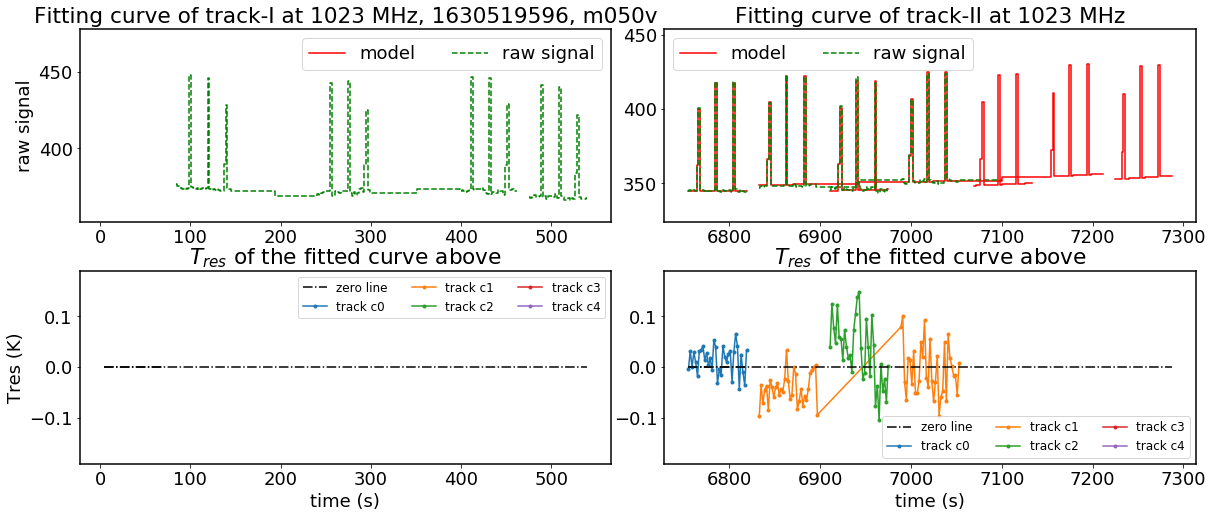

In [128]:
##show model and raw vis
plt.figure(figsize=(20,8))
plt.subplots_adjust(wspace=0.1,hspace=0.25)
plt.subplot(221)
m=ks.calc_total_model_v3(timestamps, nd_ratio, T_ptr, eta_pa, Tnda, Tel, Tgal, gta, sma, nd_0, nd_1x)
ma=np.ma.array(m,mask=visa_ptr[:,ch_plot].mask)
plt.plot(timestamps[dp_c0a]-timestamps[0],ma[dp_c0a],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c0a]-timestamps[0],visa_ptr2[dp_c0a,ch_plot],'g--',drawstyle='steps-mid')
plt.plot(timestamps[dp_c1a]-timestamps[0],ma[dp_c1a],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c1a]-timestamps[0],visa_ptr2[dp_c1a,ch_plot],'g--',drawstyle='steps-mid')
#if fname in ['1551055211','1551037708','1630519596']:
plt.plot(timestamps[dp_c2a]-timestamps[0],ma[dp_c2a],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c3a]-timestamps[0],ma[dp_c3a],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c4a]-timestamps[0],ma[dp_c4a],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c2a]-timestamps[0],visa_ptr2[dp_c2a,ch_plot],'g--',drawstyle='steps-mid')
plt.plot(timestamps[dp_c3a]-timestamps[0],visa_ptr2[dp_c3a,ch_plot],'g--',drawstyle='steps-mid')
plt.plot(timestamps[dp_c4a]-timestamps[0],visa_ptr2[dp_c4a,ch_plot],'g--',drawstyle='steps-mid')
#plt.xlabel('time (s)')
plt.ylabel('raw signal')
plt.legend(['model','raw signal'],ncol=2)
plt.ylim(np.nanmin(visa_ptr[dp_c0a,ch_plot])-20,np.nanmax(visa_ptr[dp_c1a,ch_plot])+30)
plt.title('Fitting curve of track-I at '+ str(int(freqs[ch_plot]/1e6)) +' MHz, '+str(fname)+', '+str(recv))
if fname=='1551055211':
    plt.title('Fitting curve of track-I at '+ str(int(freqs[ch_plot]/1e6)) +' MHz, '+str(recv)+' of obs190225')
plt.subplot(223)
ga=ks.func_gt(timestamps,gta)
resia=(visa_ptr2[:,ch_plot]-ma)/ga
plt.plot([timestamps[dp_c0a][0]-timestamps[0],timestamps[dp_c0a][-1]-timestamps[0]],[0,0],'k-.')
plt.plot(timestamps[dp_c0a]-timestamps[0],resia[dp_c0a],'.-')
plt.plot(timestamps[dp_c1a]-timestamps[0],resia[dp_c1a],'.-')
#if fname in ['1551055211','1551037708','1630519596']:
plt.plot(timestamps[dp_c2a]-timestamps[0],resia[dp_c2a],'.-')
plt.plot(timestamps[dp_c3a]-timestamps[0],resia[dp_c3a],'.-')
plt.plot(timestamps[dp_c4a]-timestamps[0],resia[dp_c4a],'.-')
plt.plot([timestamps[dp_c0a][0]-timestamps[0],timestamps[dp_c4a][-1]-timestamps[0]],[0,0],'k-.')
plt.xlabel('time (s)')
plt.ylabel('Tres (K)')
plt.ylim(-0.15,0.15)
#plt.legend(['line of T=0 K','track calibrator outskirt', 'track calibrator center'],ncol=3)
#if fname in ['1551055211','1551037708','1579725085', '1580260015','1630519596']:
plt.legend(['zero line','track c0', 'track c1', 'track c2', 'track c3','track c4'], fontsize=12, ncol=3)
plt.ylim(-0.19,0.19)
plt.title('$T_{res}$ of the fitted curve above')
#plt.savefig('caliA_ch'+str(ch_plot)+'.png')
##show model and raw vis
plt.subplot(222)
m=ks.calc_total_model_v3(timestamps, nd_ratio, T_ptr, eta_pb, Tndb, Tel, Tgal, gtb, smb, nd_0, nd_1x)
mb=np.ma.array(m,mask=visb_ptr[:,ch_plot].mask)
plt.plot(timestamps[dp_c0b]-timestamps[0],mb[dp_c0b],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c0b]-timestamps[0],visb_ptr2[dp_c0b,ch_plot],'g--',drawstyle='steps-mid')
plt.plot(timestamps[dp_c1b]-timestamps[0],mb[dp_c1b],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c1b]-timestamps[0],visb_ptr2[dp_c1b,ch_plot],'g--',drawstyle='steps-mid')
#if fname in ['1551055211','1551037708','1579725085', '1580260015','1630519596']:
plt.plot(timestamps[dp_c2b]-timestamps[0],mb[dp_c2b],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c3b]-timestamps[0],mb[dp_c3b],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c4b]-timestamps[0],mb[dp_c4b],'r-',drawstyle='steps-mid')
plt.plot(timestamps[dp_c2b]-timestamps[0],visb_ptr2[dp_c2b,ch_plot],'g--',drawstyle='steps-mid')
plt.plot(timestamps[dp_c3b]-timestamps[0],visb_ptr2[dp_c3b,ch_plot],'g--',drawstyle='steps-mid')
plt.plot(timestamps[dp_c4b]-timestamps[0],visb_ptr2[dp_c4b,ch_plot],'g--',drawstyle='steps-mid')
plt.ylim(np.nanmin(visb_ptr2[dp_c0b,ch_plot])-20,np.nanmax(visb_ptr2[dp_c1b,ch_plot])+30)
#plt.xlabel('time (s)')
#plt.ylabel('raw signal')
plt.legend(['model','raw signal'],ncol=2)
plt.title('Fitting curve of track-II at '+ str(int(freqs[ch_plot]/1e6)) +' MHz')
plt.subplot(224)
gb=ks.func_gt(timestamps,gtb)
resib=(visb_ptr2[:,ch_plot]-mb)/gb
plt.plot([timestamps[dp_c0b][0]-timestamps[0],timestamps[dp_c0b][-1]-timestamps[0]],[0,0],'k-.')
plt.plot(timestamps[dp_c0b]-timestamps[0],resib[dp_c0b],'.-')
plt.plot(timestamps[dp_c1b]-timestamps[0],resib[dp_c1b],'.-')
#if fname in ['1551055211','1551037708','1579725085', '1580260015','1630519596']:
plt.plot(timestamps[dp_c2b]-timestamps[0],resib[dp_c2b],'.-')
plt.plot(timestamps[dp_c3b]-timestamps[0],resib[dp_c3b],'.-')
plt.plot(timestamps[dp_c4b]-timestamps[0],resib[dp_c4b],'.-')
plt.plot([timestamps[dp_c0b][0]-timestamps[0],timestamps[dp_c4b][-1]-timestamps[0]],[0,0],'k-.')
plt.xlabel('time (s)')
#plt.ylabel('residual (K)')
#if fname in ['1551055211','1551037708','1579725085', '1580260015','1630519596']:
plt.legend(['zero line','track c0', 'track c1', 'track c2', 'track c3','track c4'],fontsize=12, ncol=3)
#plt.title('calibrator Part II of '+str(fname)+', '+str(recv)+ ' @'+ str(round(freqs[ch_plot]/1e9,3)) +' GHz')
plt.ylim(-0.19,0.19)
plt.title('$T_{res}$ of the fitted curve above')
#plt.savefig('F_caliB_ch'+str(ch_plot)+'.pdf', bbox_inches='tight')
plt.show()


In [129]:
print(track1_on_count,track1_off_count,track2_on_count,track2_off_count)

3 1 2 2


In [130]:
print ('Tnd_ref: '+str(Tnd_ref))
print ('pre-fit: '+str(Tnda_raw)+' '+str(Tndb_raw))
if Tnda>0:
    print ('Tnda: '+str(Tnda))
if Tndb>0:
    print ('Tndb: '+str(Tndb))
if Tnda>0 and Tndb>0:
    print ('Tnd mean: '+str((Tnda+Tndb)/2.))


Tnd_ref: 23.07245815127522
pre-fit: 25.06204001280865 24.47437882406701
Tndb: 25.256274502464628


In [131]:
#copy end

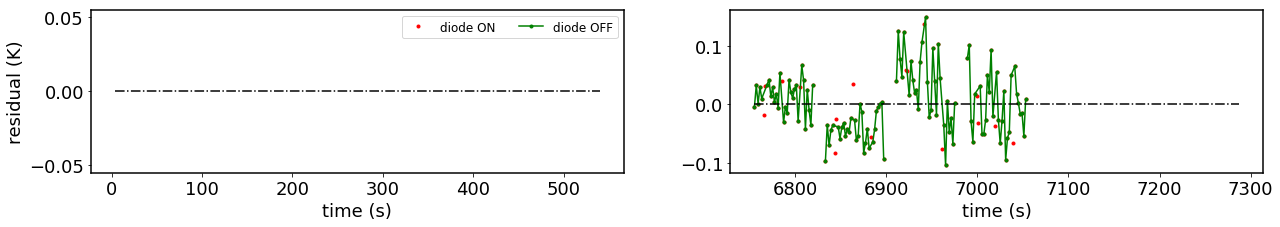

In [132]:
#diode off only
plt.figure(figsize=(21,3))
plt.subplot(121)
plt.plot(timestamps-timestamps[0],resia,'r.')
plt.plot(timestamps[nd_0]-timestamps[0],resia[nd_0],'g.-')
plt.plot([timestamps[dp_ca][0]-timestamps[0],timestamps[dp_ca][-1]-timestamps[0]],[0,0],'k-.')
plt.xlabel('time (s)')
plt.ylabel('residual (K)')
plt.legend(['diode ON', 'diode OFF'],ncol=2,fontsize=12)
plt.subplot(122)
plt.plot(timestamps-timestamps[0],resib,'r.')
plt.plot(timestamps[nd_0]-timestamps[0],resib[nd_0],'g.-')
plt.plot([timestamps[dp_cb][0]-timestamps[0],timestamps[dp_cb][-1]-timestamps[0]],[0,0],'k-.')
plt.xlabel('time (s)')
#plt.ylabel('raw vis')
plt.show()

In [133]:
#check results
print (eta_pa,eta_pb)
print (ga[dp_ca].mean(),gb[dp_cb].mean())
print (ks.func_sm(timestamps,sma)[dp_ca].mean(),ks.func_sm(timestamps,smb)[dp_cb].mean())

0 1.0
0.0 19.946056916892697
0.0 8.285134270225653


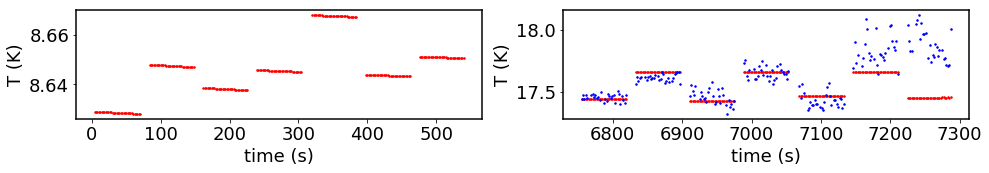

In [134]:
mta_raw=eta_pa*T_ptr+Tgal+Tel+Tcmb+sma
mtb_raw=eta_pb*T_ptr+Tgal+Tel+Tcmb+smb

plt.figure(figsize=(16,2))
plt.subplot(121)
plt.plot(data.timestamps[dp_ca]-data.timestamps[0],mta_raw[dp_ca],'r.',ms=3)
plt.plot(data.timestamps[nd_0]-data.timestamps[0],visa_ptr[nd_0,ch_plot]/ks.func_gt(timestamps,gta)[nd_0],'b.',ms=3)
plt.xlabel('time (s)')
plt.ylabel('T (K)')
plt.subplot(122)
plt.plot(data.timestamps[dp_cb]-data.timestamps[0],mtb_raw[dp_cb],'r.',ms=3)
plt.plot(data.timestamps[nd_0]-data.timestamps[0],visb_ptr[nd_0,ch_plot]/ks.func_gt(timestamps,gtb)[nd_0],'b.',ms=3)
plt.xlabel('time (s)')
plt.ylabel('T (K)')
plt.show()


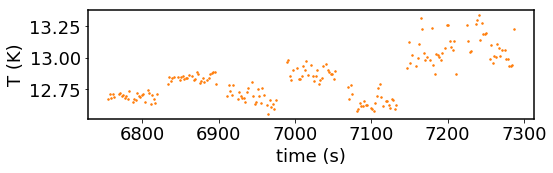

In [135]:
plt.figure(figsize=(8,2))
plt.plot(data.timestamps[nd_0]-data.timestamps[0],visa_ptr[nd_0,ch_plot]/ga[nd_0]-Tel[nd_0],'.',ms=3)
plt.plot(data.timestamps[nd_0]-data.timestamps[0],visb_ptr[nd_0,ch_plot]/gb[nd_0]-Tel[nd_0],'.',ms=3)
plt.xlabel('time (s)')
plt.ylabel('T (K)')
plt.show()

In [136]:
ch_plot

800

In [137]:
try:
    d=pickle.load(open(fname+'_'+str(recv)+'_level2_Tnd_data'))
    Tnda_list=d['Tnda_list']
    Tndb_list=d['Tndb_list']
    Tnd_ref_list=d['Tnd_ref_list']
    print ('# existed Tnd_data loaded')
    
except(Exception):
    Tnd_ref_list=[None for i in range(len(freqs))]
    Tnda_list=[None for i in range(len(freqs))]
    Tndb_list=[None for i in range(len(freqs))]
    print ('# empty Tnd_data created')
    
Tnd_ref_list[ch_plot]=Tnd_ref
Tnda_list[ch_plot]=Tnda
Tndb_list[ch_plot]=Tndb

d2={}
d2['Tnd_ref_list']=Tnd_ref_list
d2['Tnda_list']=Tnda_list
d2['Tndb_list']=Tndb_list
fs=open(fname+'_'+str(recv)+'_level2_Tnd_data','wb')
pickle.dump(d2,fs,protocol=2)
fs.close()
print ('# Tnd_data saved')

# empty Tnd_data created
# Tnd_data saved


In [138]:
print ('end @ ' + time.asctime(time.localtime(time.time())) +'#')

end @ Mon Oct 31 11:52:00 2022#


In [139]:
###below is for full band####

In [140]:
####prepare for data storage#################
T_map=np.ma.array(np.zeros_like(vis),mask=True)
Tresi_map=np.ma.array(np.zeros_like(vis),mask=True)
gain_map=np.ma.array(np.zeros_like(vis),mask=True)
Tel_map=np.ma.array(np.zeros_like(vis),mask=True)

Tnd_ref_list=[None for i in range(len(freqs))]
Tnda_list=[None for i in range(len(freqs))]
Tndb_list=[None for i in range(len(freqs))]
if target=='PKS1934-638':
    Tnda_raw_list=[None for i in range(len(freqs))]
    Tndb_raw_list=[None for i in range(len(freqs))]
gta_param=[None for i in range(len(freqs))]
gtb_param=[None for i in range(len(freqs))]

sma_param=[None for i in range(len(freqs))]
smb_param=[None for i in range(len(freqs))]



In [141]:
####data need to storage######
Tnd_ref_list[ch_plot]=Tnd_ref
Tnda_list[ch_plot]=Tnda
Tndb_list[ch_plot]=Tndb
if target=='PKS1934-638':
    Tnda_raw_list[ch_plot]=Tnda_raw
    Tndb_raw_list[ch_plot]=Tndb_raw
gta_param[ch_plot]=gta
gtb_param[ch_plot]=gtb

gain_map[dp_ca,ch_plot]=ga[dp_ca]
gain_map[dp_cb,ch_plot]=gb[dp_cb]

calT_tra=visa_ptr[:,ch_plot]/ga
calT_trb=visb_ptr[:,ch_plot]/gb
if Tnda>0:
    assert((abs(calT_tra[dp_ca]-ma[dp_ca]/ga[dp_ca]-resia[dp_ca])<1e-10).all()==True)
if Tndb>0:
    assert((abs(calT_trb[dp_cb]-mb[dp_cb]/gb[dp_cb]-resib[dp_cb])<1e-10).all()==True)
T_map[dp_ca,ch_plot]=calT_tra[dp_ca]
T_map[dp_cb,ch_plot]=calT_trb[dp_cb]

Tresi_map[dp_ca,ch_plot]=resia[dp_ca]
Tresi_map[dp_cb,ch_plot]=resib[dp_cb]

sma_param[ch_plot]=sma
smb_param[ch_plot]=smb

Tel_map[:,ch_plot]=Tel

print (ch_plot, Tnd_ref, Tnda, Tndb)


800 23.07245815127522 0 25.256274502464628


In [142]:
print (abs(calT_tra[dp_ca]-ma[dp_ca]/ga[dp_ca]-resia[dp_ca]).max())
print (abs(calT_trb[dp_cb]-mb[dp_cb]/gb[dp_cb]-resib[dp_cb]).max())

--
3.0253577421035516e-15


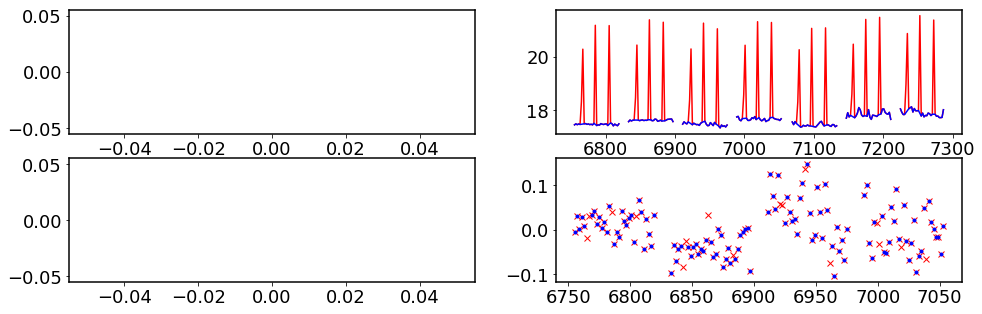

In [143]:
plt.figure(figsize=(16,5))
plt.subplot(221)
plt.plot(timestamps-timestamps[0],calT_tra,'r')
plt.plot(timestamps[nd_0]-timestamps[0],calT_tra[nd_0],'b')
plt.subplot(222)
plt.plot(timestamps-timestamps[0],calT_trb,'r')
plt.plot(timestamps[nd_0]-timestamps[0],calT_trb[nd_0],'b')
plt.subplot(223)
plt.plot(timestamps-timestamps[0],resia,'rx')
plt.plot(timestamps[nd_0]-timestamps[0],resia[nd_0],'b.')
plt.subplot(224)
plt.plot(timestamps-timestamps[0],resib,'rx')
plt.plot(timestamps[nd_0]-timestamps[0],resib[nd_0],'b.')
plt.show()

In [144]:
output_file='./'

####save data####
d={}
d['T_map']=T_map
d['Tresi_map']=Tresi_map
d['gain_map']=gain_map
d['Tel_map']=Tel_map
d['Tnd_ref_list']=Tnd_ref_list
d['Tnda_list']=Tnda_list
d['Tndb_list']=Tndb_list
if target=='PKS1934-638':
    d['Tnda_raw_list']=Tnda_raw_list
    d['Tndb_raw_list']=Tndb_raw_list
d['gta_param']=gta_param
d['gtb_param']=gtb_param
d['sma_param']=sma_param
d['smb_param']=smb_param
d['timestamps']=timestamps
d['nd_0']=nd_0
d['ra']=ra
d['dec']=dec
fs=open(output_file+str(fname)+'_'+str(recv)+'_level2_data','wb')
pickle.dump(d,fs,protocol=2)
fs.close()


d2={}
d2['Tnd_ref_list']=Tnd_ref_list
d2['Tnda_list']=Tnda_list
d2['Tndb_list']=Tndb_list
if target=='PKS1934-638':
    d2['Tnda_raw_list']=Tnda_raw_list
    d2['Tndb_raw_list']=Tndb_raw_list
fs=open(output_file+str(fname)+'_'+str(recv)+'_level2_Tnd_data','wb')
pickle.dump(d2,fs,protocol=2)
fs.close()


In [145]:
print ('end @ ' + time.asctime(time.localtime(time.time())) +'#')

end @ Mon Oct 31 11:52:07 2022#
